In [1]:
import analyzer.plotting
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np
import matplotlib.pyplot as plt
from analyzer.plotting import PlotObject, drawAs1DHist, drawAs2DHist
from hist import Hist

In [2]:
SIGNAL_NAMES = ['signal_312_1000_400',
                'signal_312_1000_600',
                'signal_312_1000_700',
                'signal_312_1000_800',
                'signal_312_1000_900',
                'signal_312_1200_400',
                'signal_312_1200_600',
                'signal_312_1200_700',
                'signal_312_1200_800',
                'signal_312_1200_900',
                'signal_312_1200_1000',
                'signal_312_1200_1100',
                'signal_312_1300_400',
                'signal_312_1300_600',
                'signal_312_1300_1200',
                'signal_312_1400_400',
                'signal_312_1400_600',
                'signal_312_1400_1300',
                'signal_312_1500_400',
                'signal_312_1500_600',
                'signal_312_1500_900',
                'signal_312_1500_1000',
                'signal_312_1500_1100',
                'signal_312_1500_1200',
                'signal_312_1500_1300',
                'signal_312_1500_1350',
                'signal_312_1500_1400',
                'signal_312_1500_1450',
                'signal_312_2000_400',
                'signal_312_2000_600',
                'signal_312_2000_900',
                'signal_312_2000_1200',
                'signal_312_2000_1300',
                'signal_312_2000_1400',
                'signal_312_2000_1500',
                'signal_312_2000_1600',
                'signal_312_2000_1700',
                'signal_312_2000_1900']

In [3]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

a = AnalysisResult.fromFile("output_signal.pkl")
a_background = AnalysisResult.fromFile("output_background.pkl")
bg_hists = a_background.getMergedHistograms(s)

In [4]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
window_width = 300

m13_m_points = []
m24_m_points = []
m3_top_3_no_lead_b_points = []
m14_m_points = []

In [5]:
hists = a.results["signal_312_1000_400"].getScaledHistograms(s, None)
signal_hist = hists["m14_vs_m13"]
background_hist = bg_hists["m14_vs_m13"]

/srv/peakquality.py:40: RuntimeWarning: invalid value encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


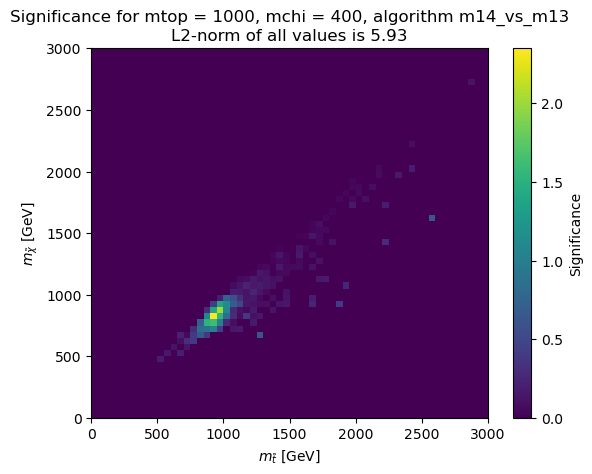

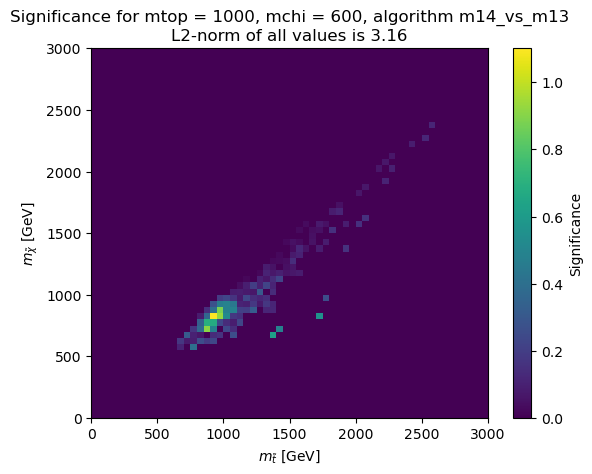

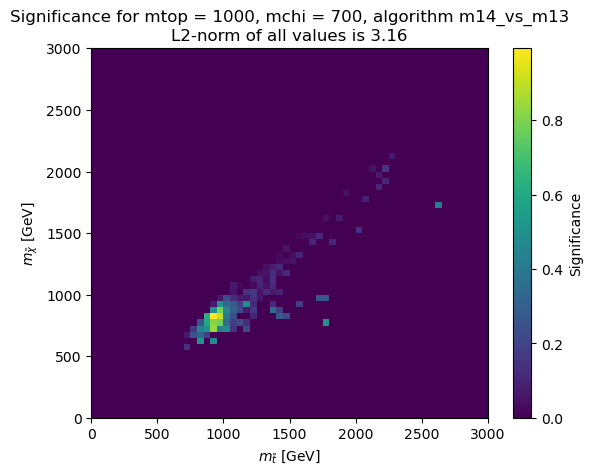

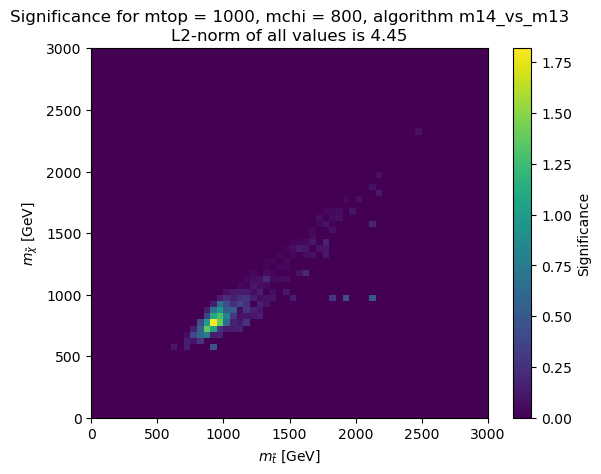

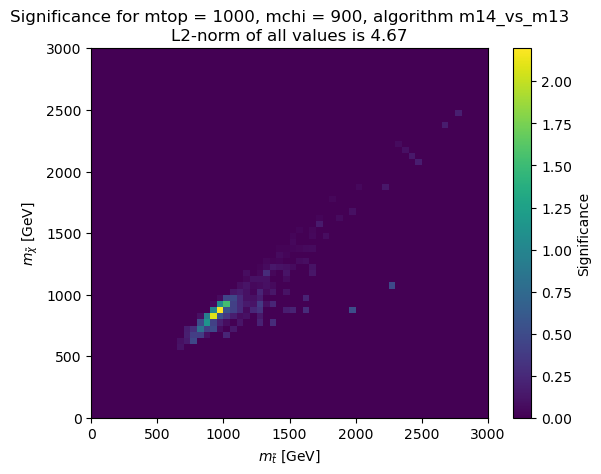

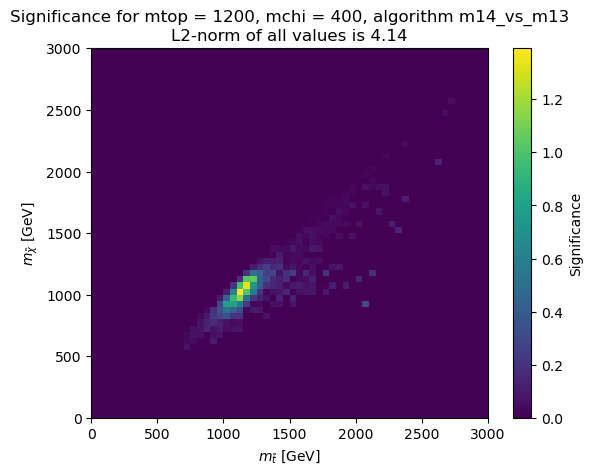

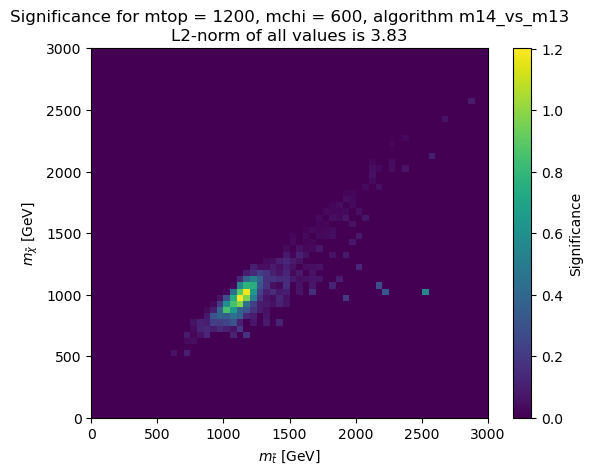

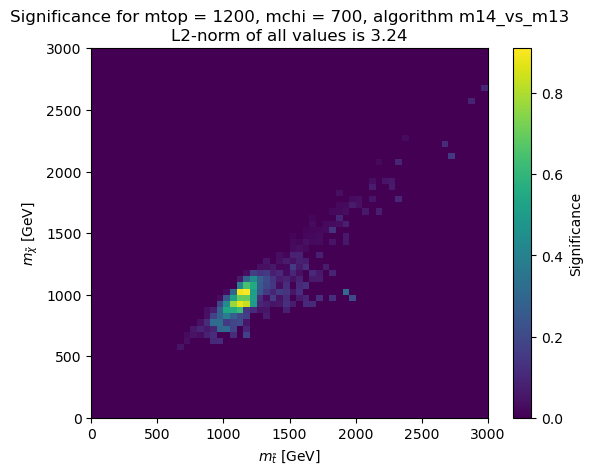

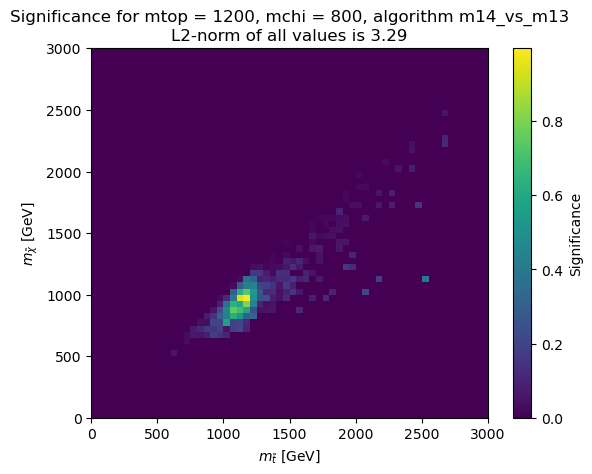

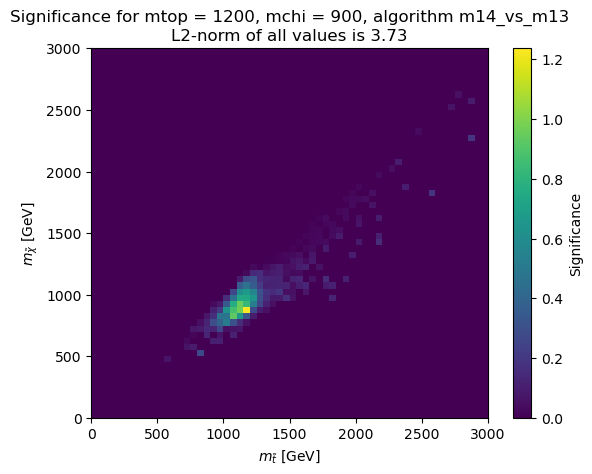

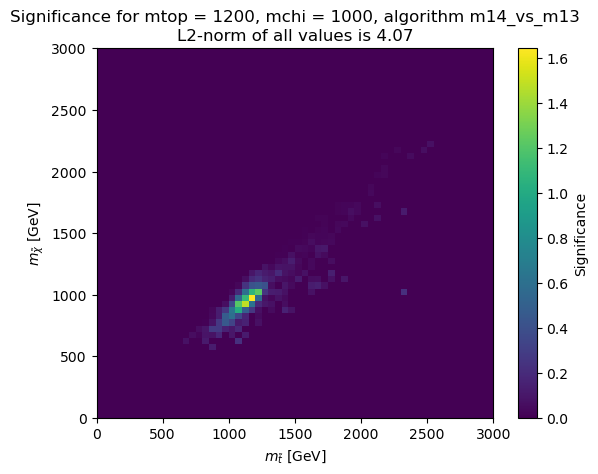

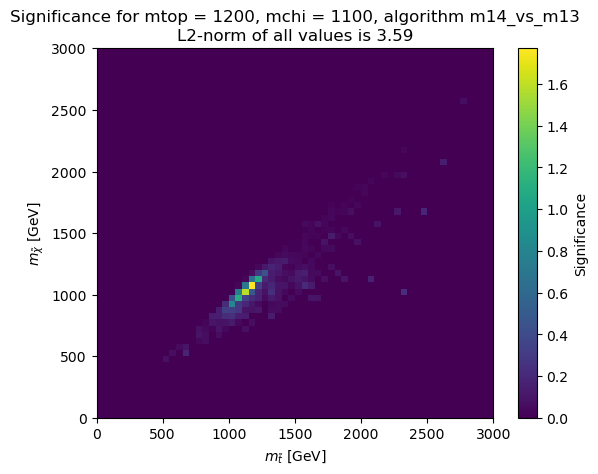

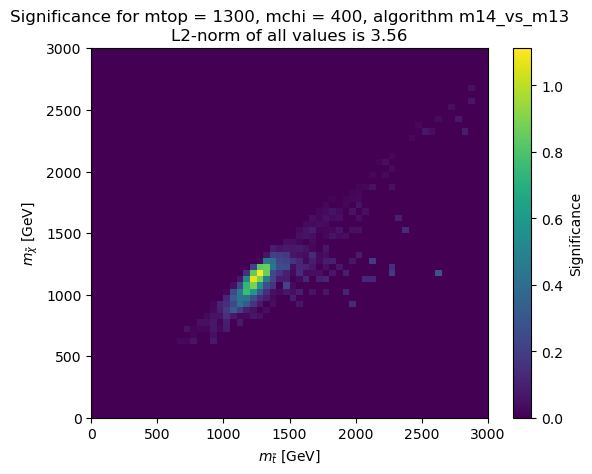

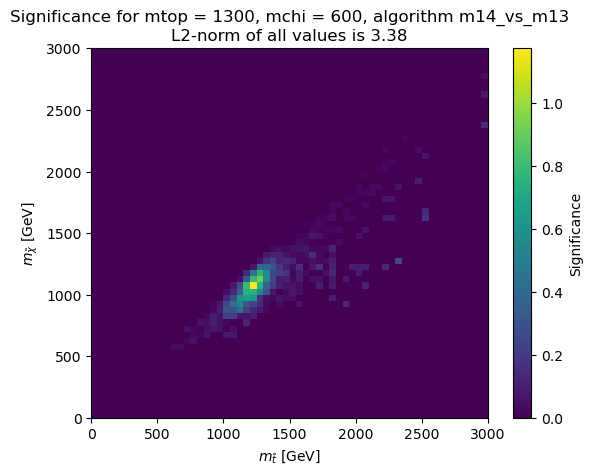

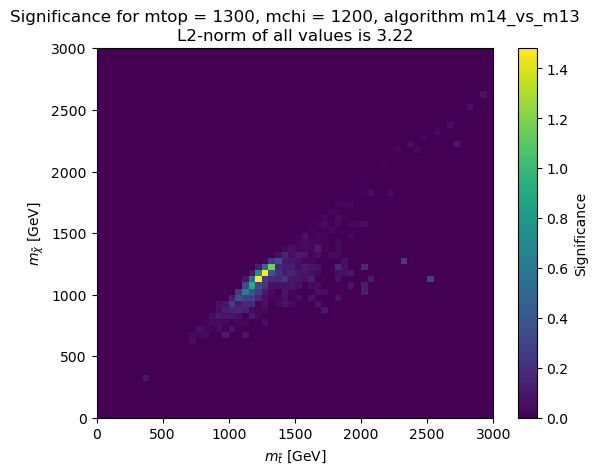

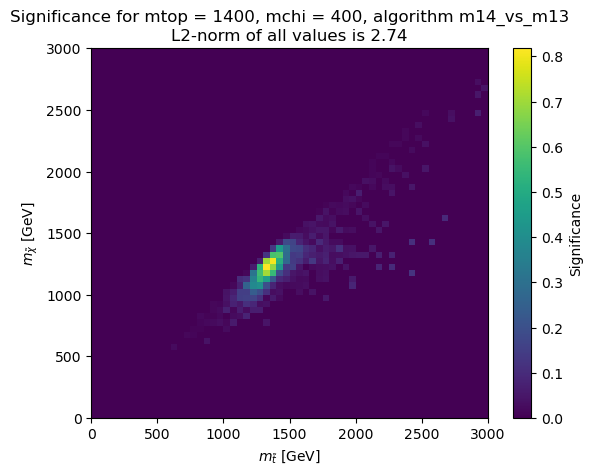

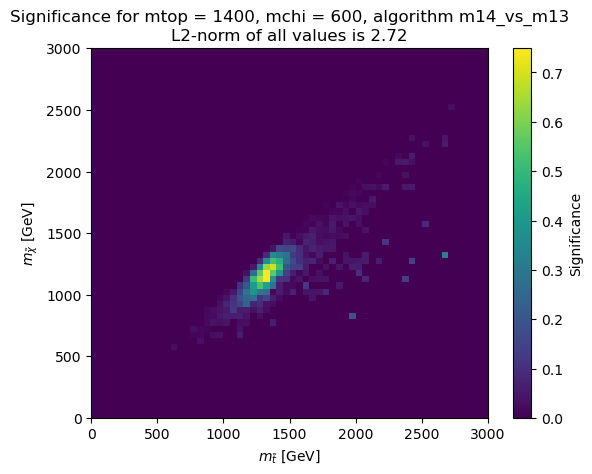

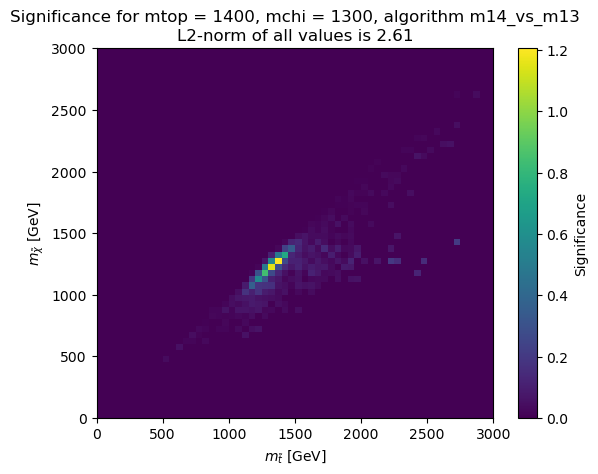

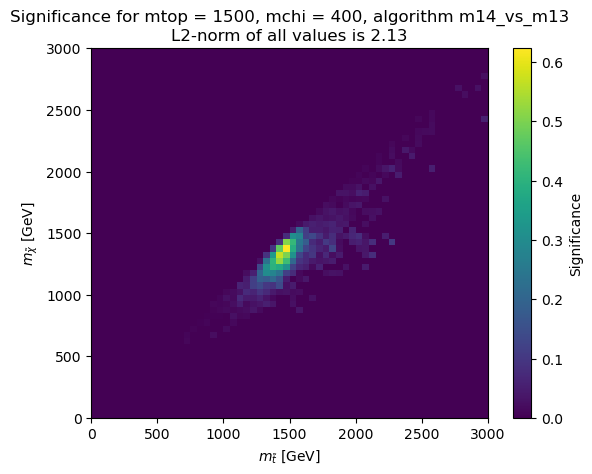

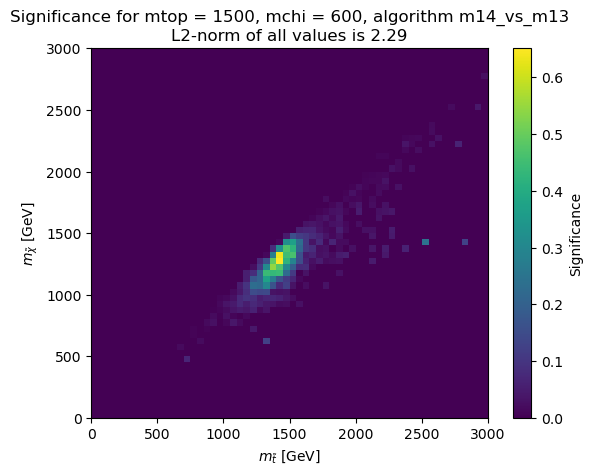

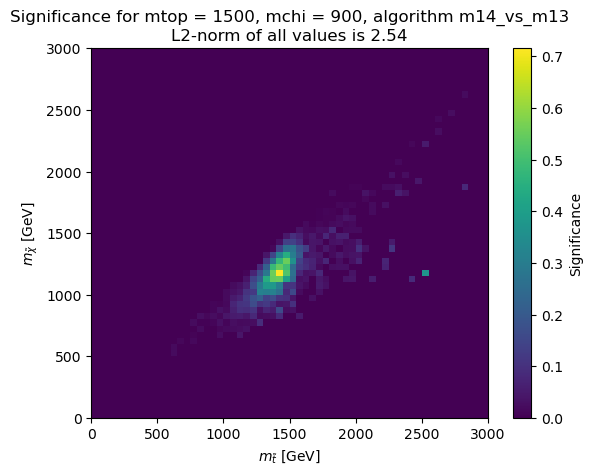

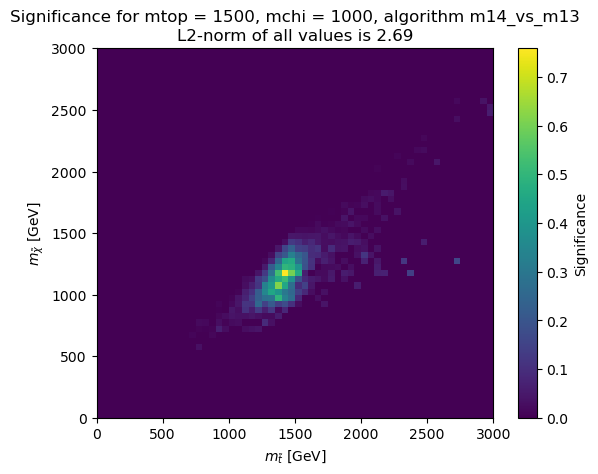

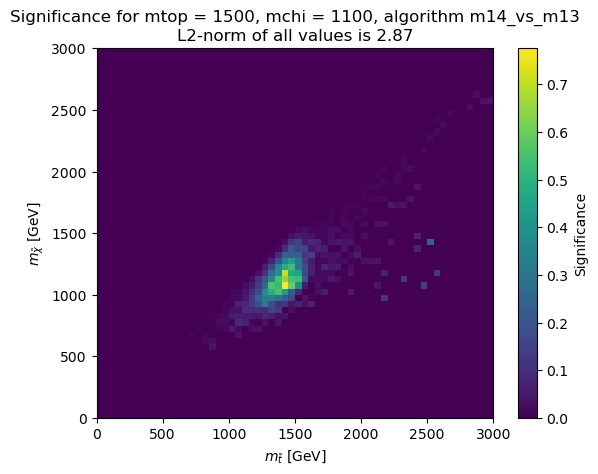

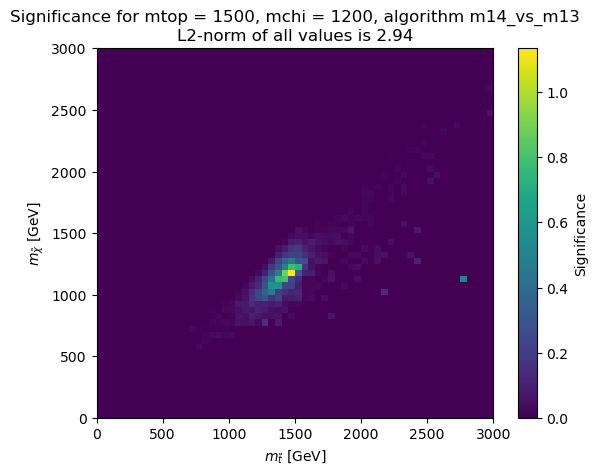

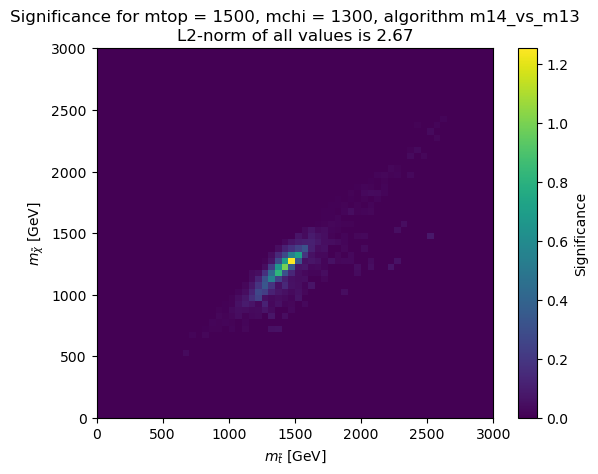

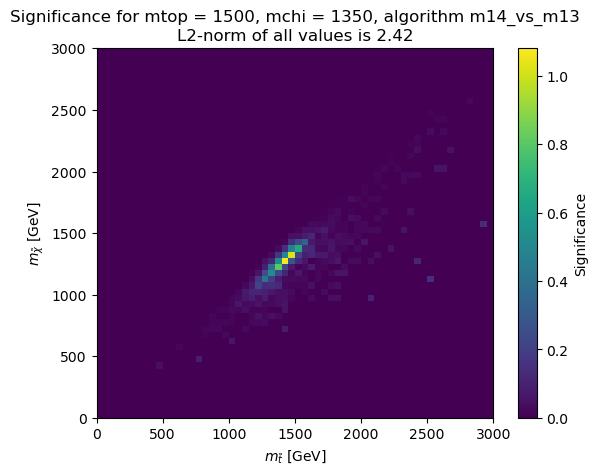

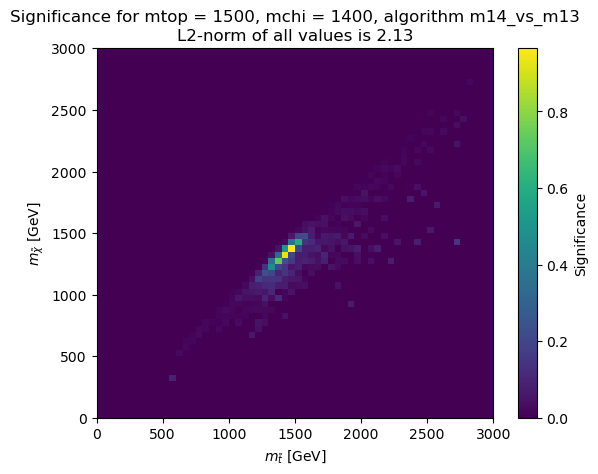

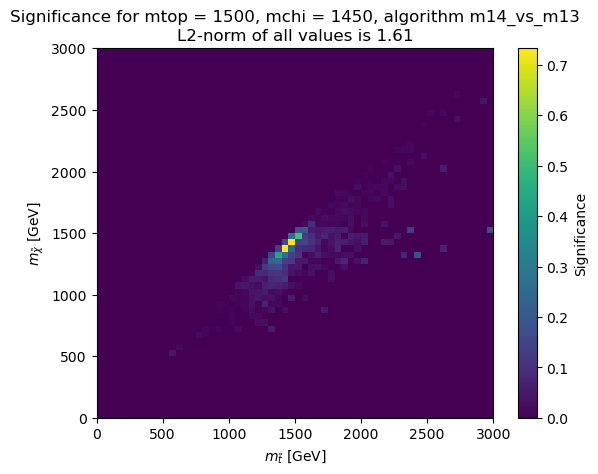

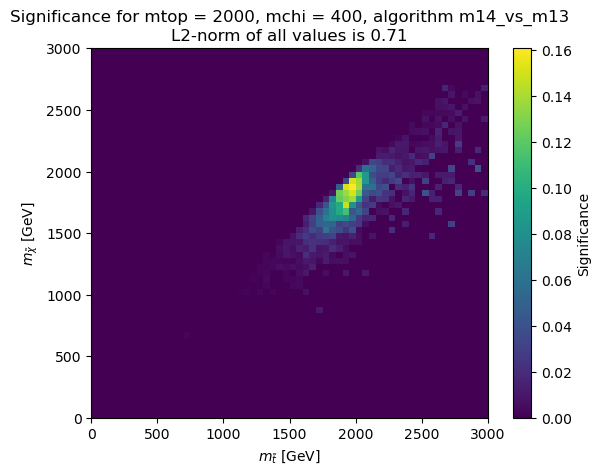

/srv/peakquality.py:40: RuntimeWarning: divide by zero encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


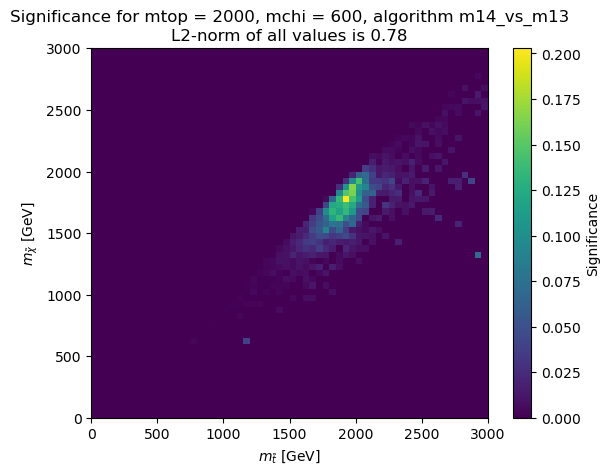

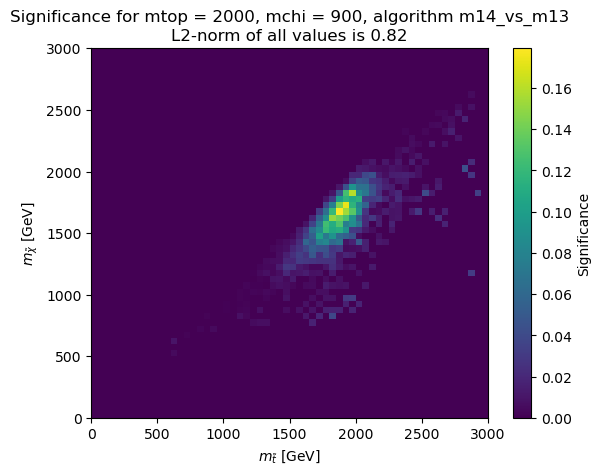

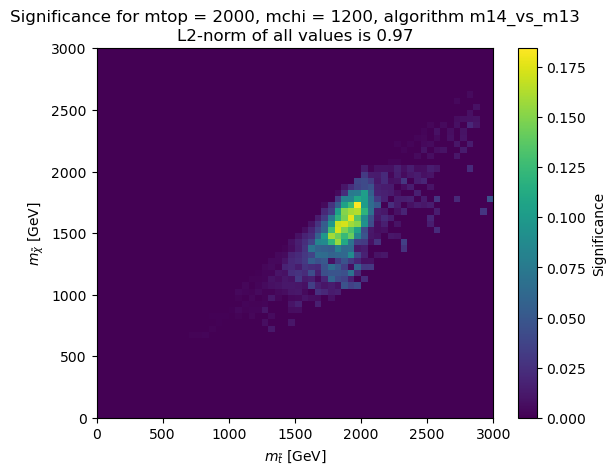

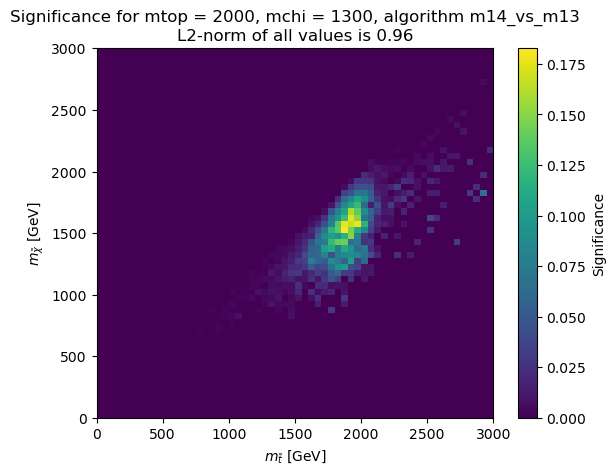

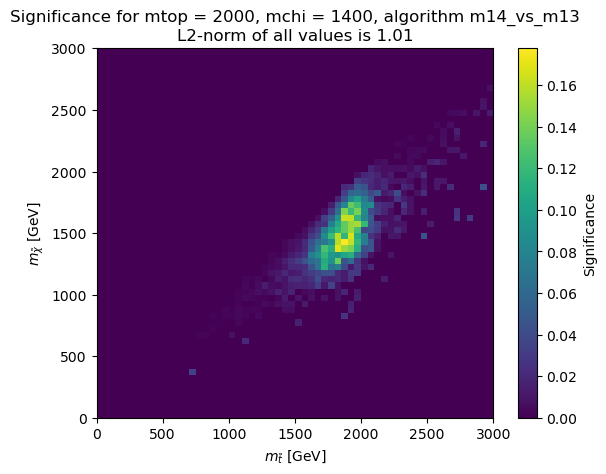

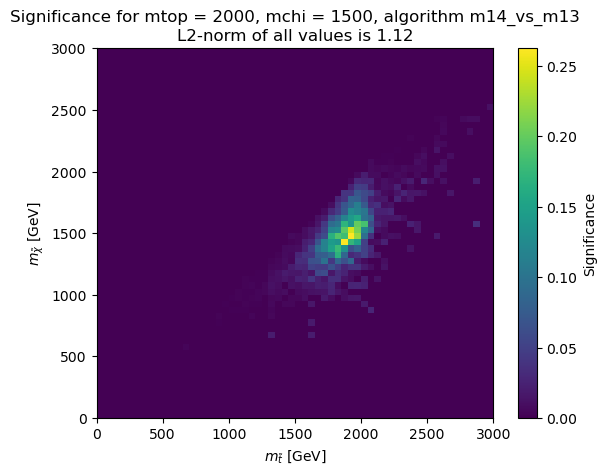

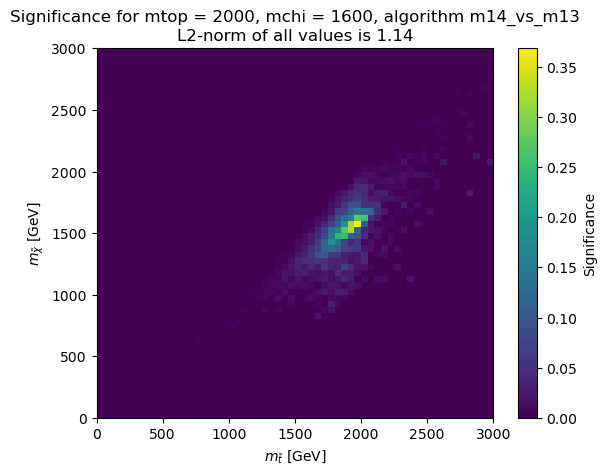

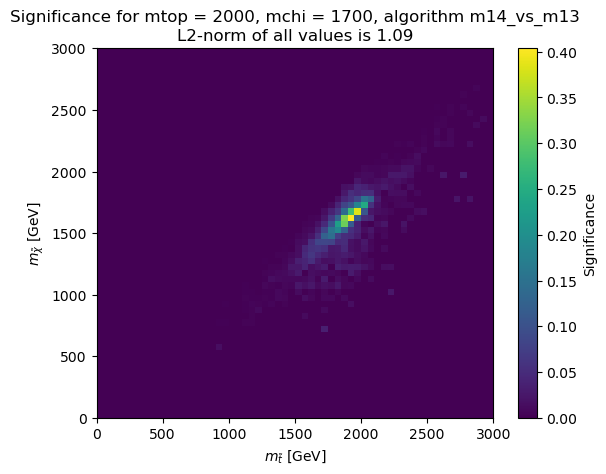

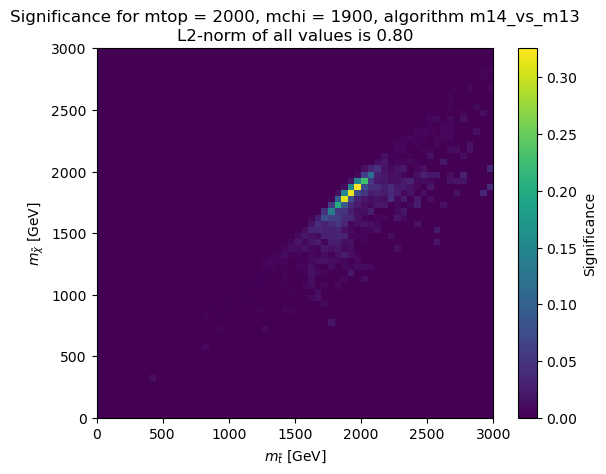

In [6]:
xvar = 'm14_vs_m13'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    significance, edges_x, edges_y, significance_points = pq.significance_2D(hists, bg_hists, "m14_vs_m13")
    
    significance_points = np.rot90(np.fliplr(significance_points))
    signal_style = s.getSet(signal).style

    fig, ax = plt.subplots()
    ax.set_title(f"Significance for mtop = {true_mtop}, mchi = {true_mchi}, algorithm {xvar}\nL2-norm of all values is {significance:.2f}")
    ax.set_xlabel("$m_{{\\tilde{{t}}}}$ [GeV]")
    ax.set_ylabel("$m_{{\\tilde{{\\chi}}}}$ [GeV]")
    cf = ax.pcolormesh(edges_x, edges_y, significance_points)
    cbar = plt.colorbar(cf)
    cbar.set_label("Significance")
    plt.show()

## uncompressed region algorithms

/srv/peakquality.py:40: RuntimeWarning: invalid value encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


<Figure size 640x480 with 0 Axes>

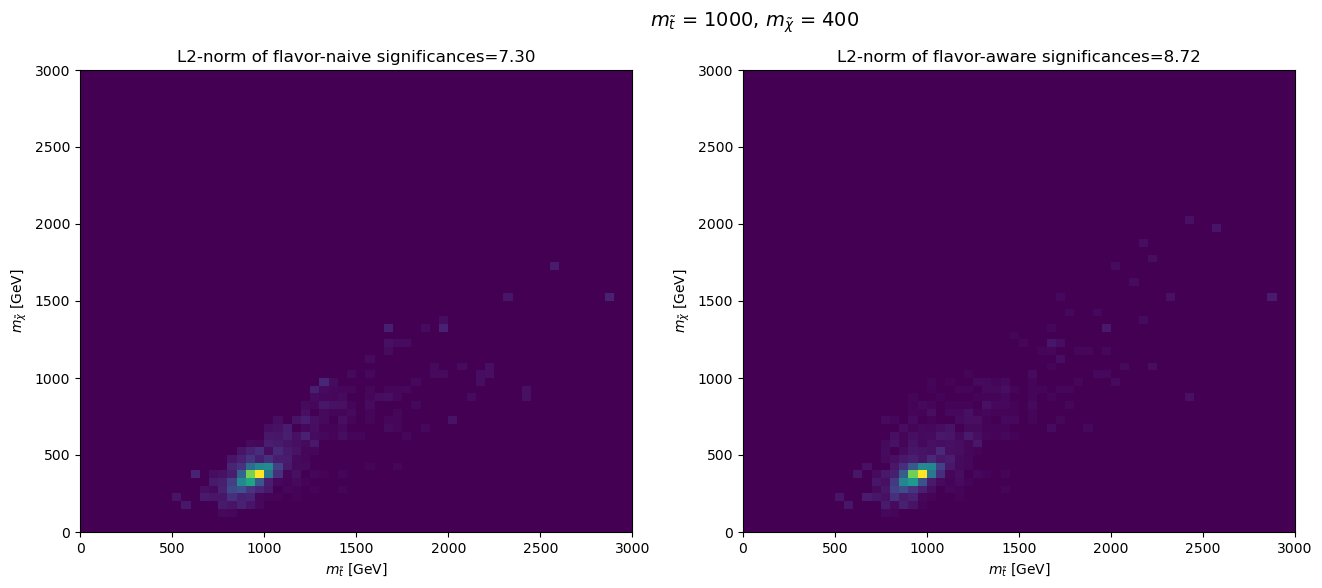

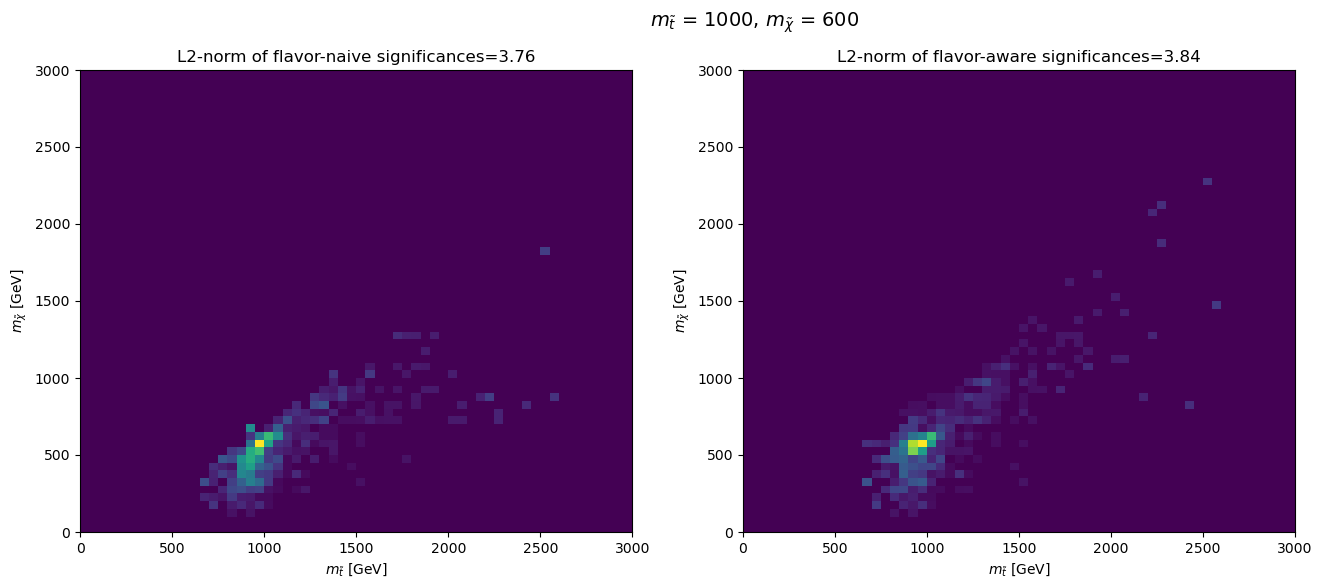

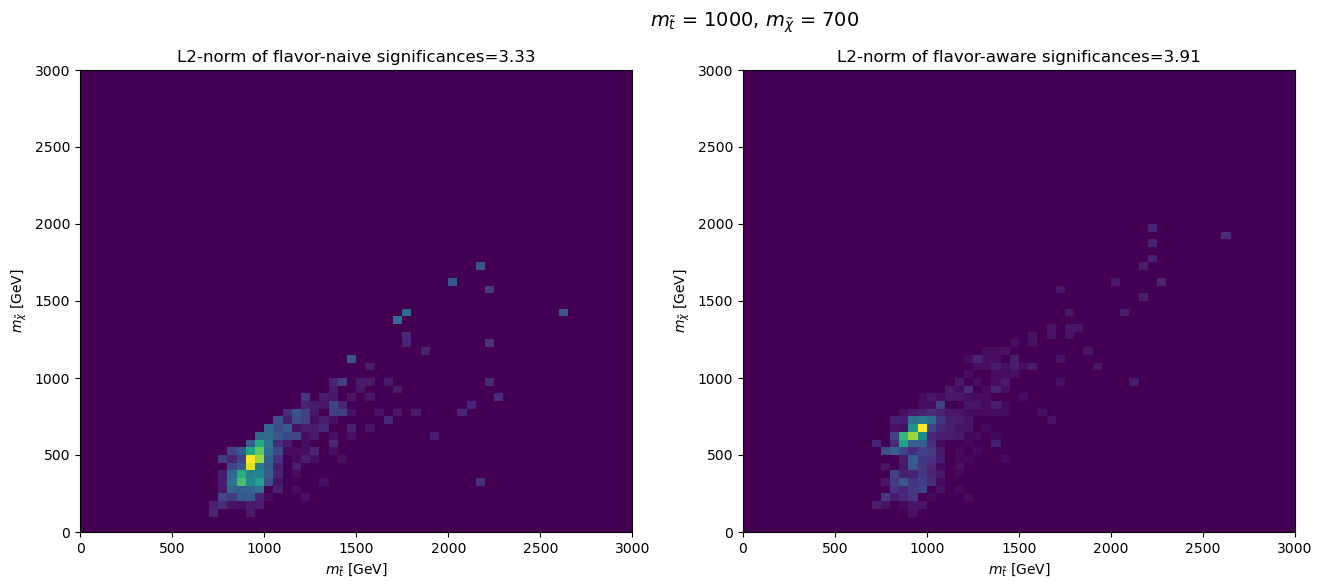

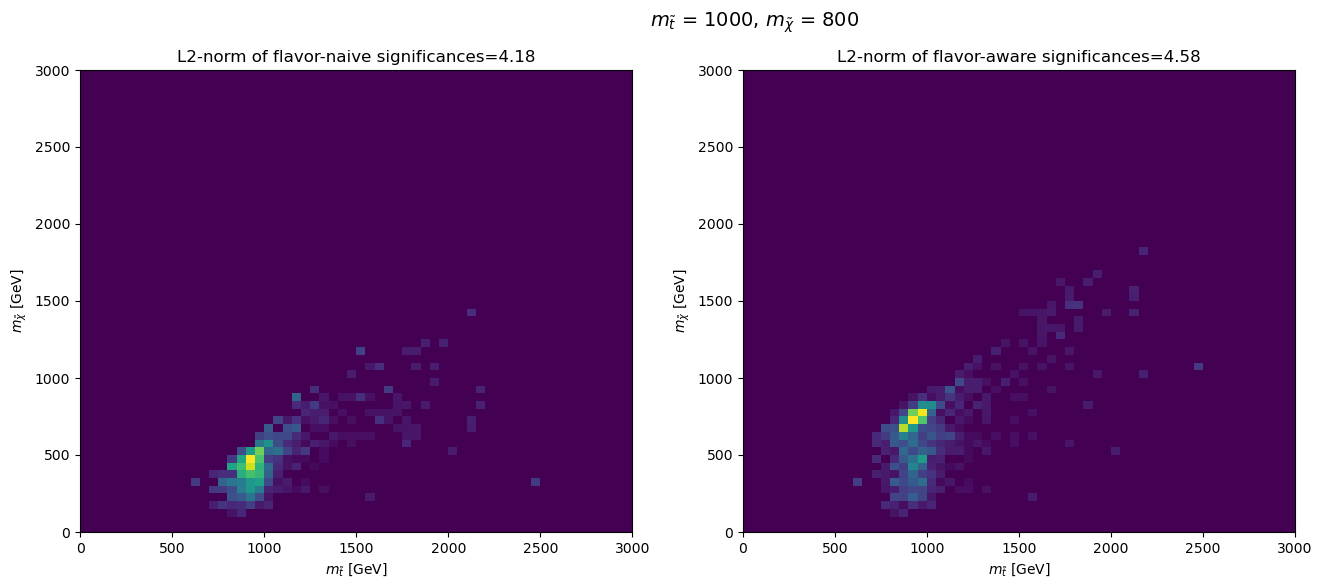

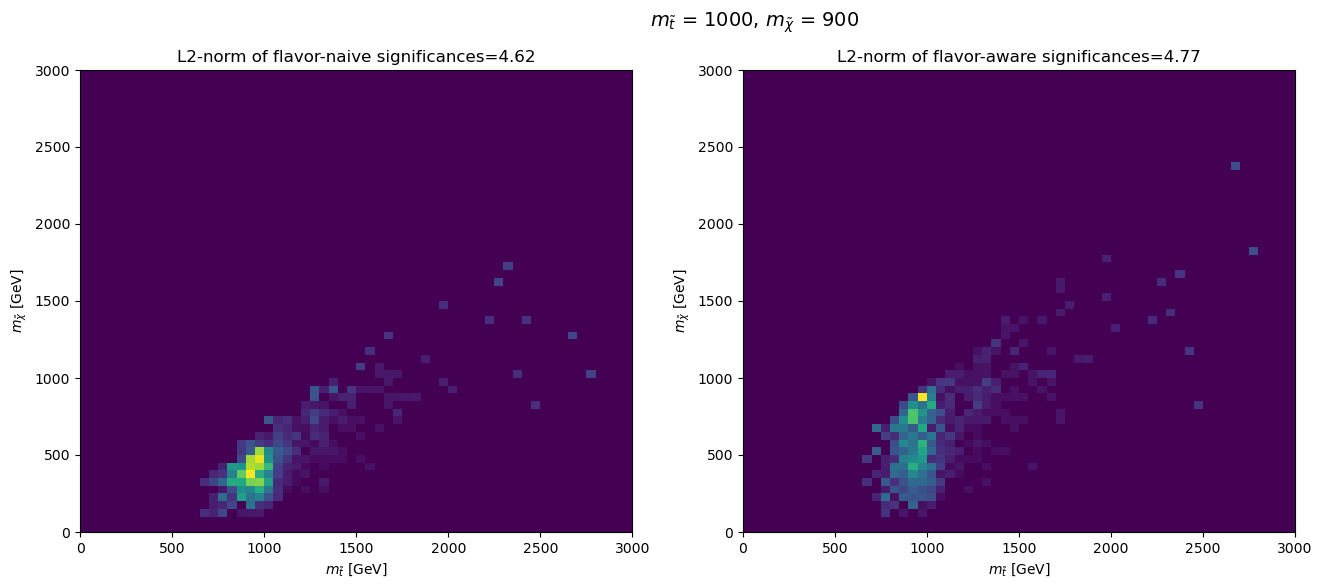

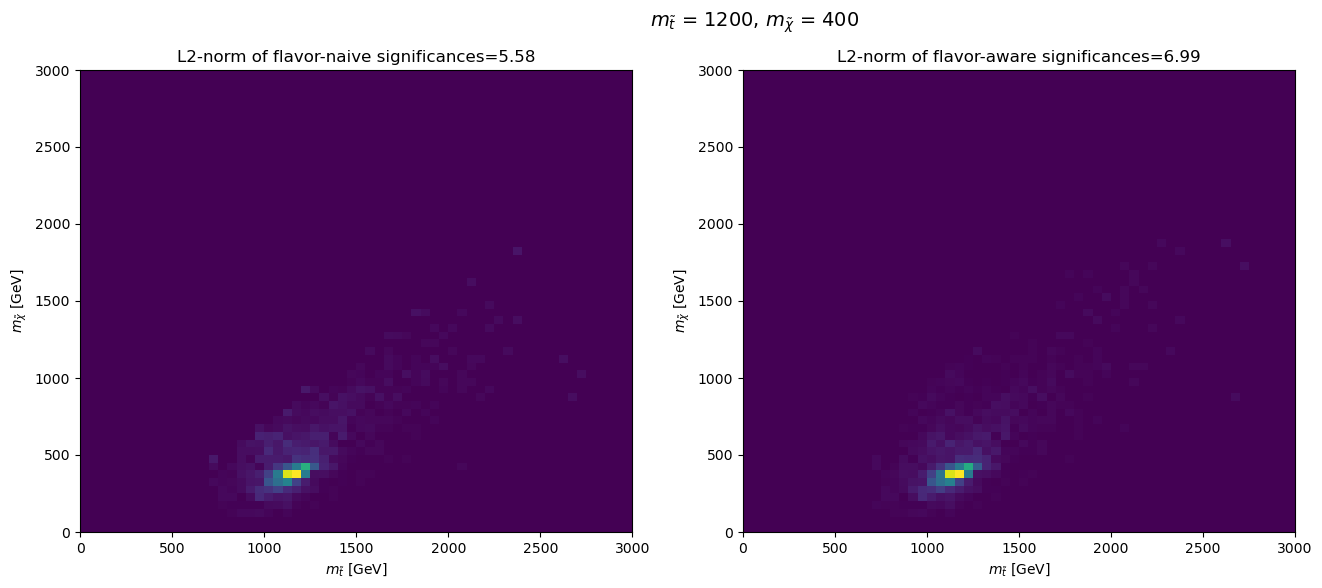

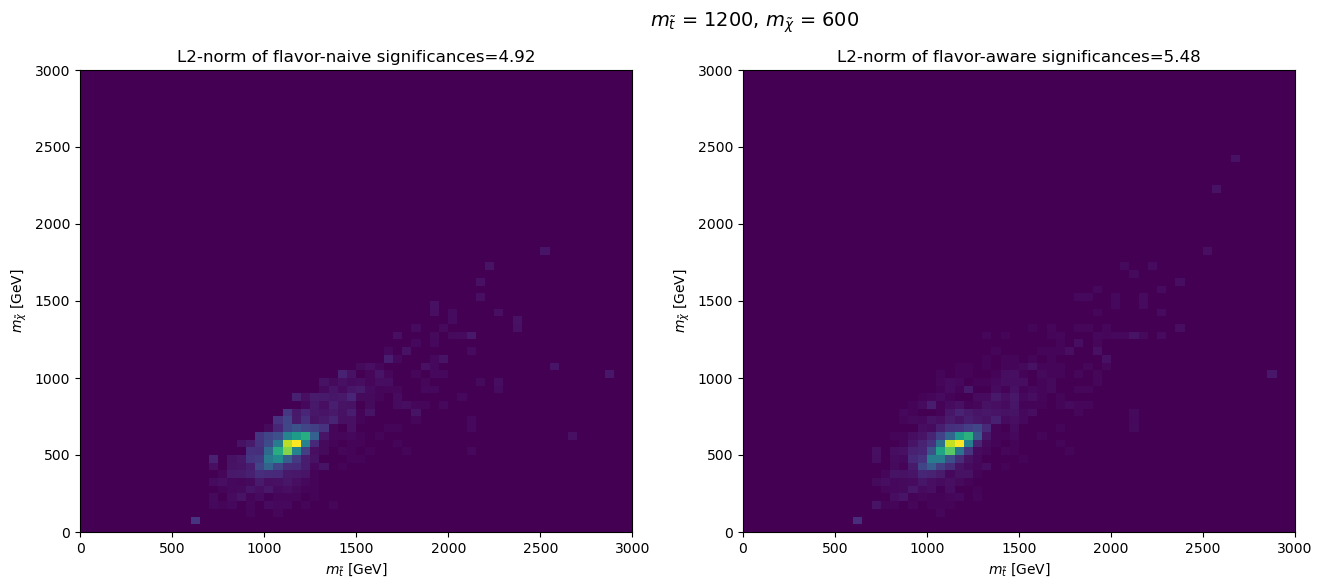

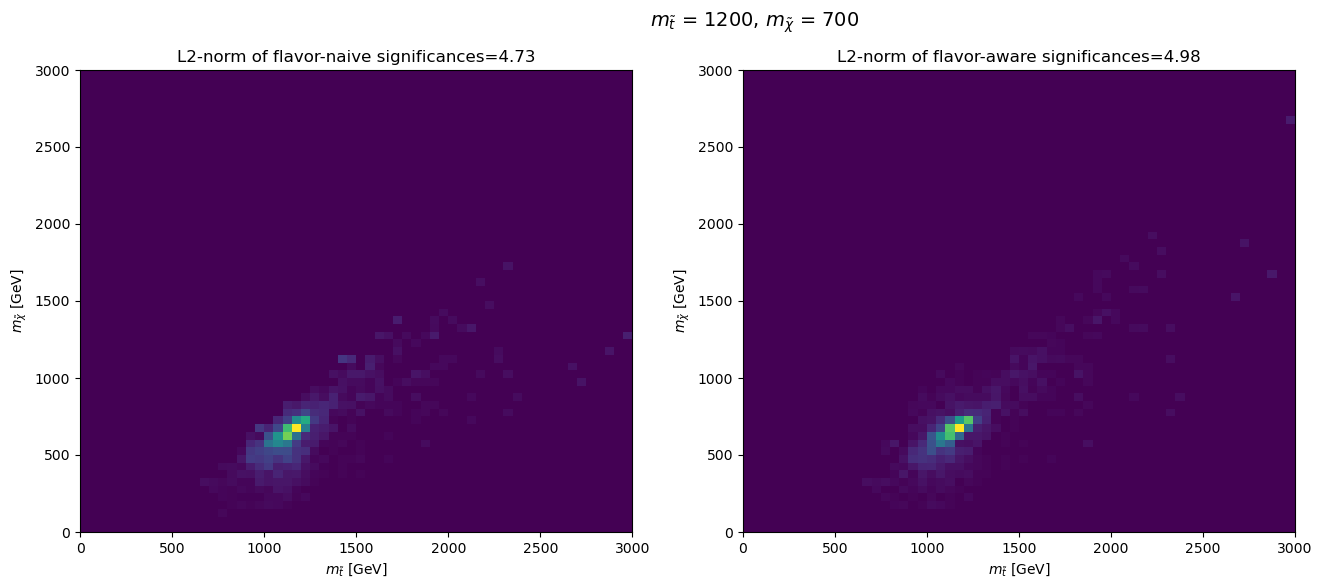

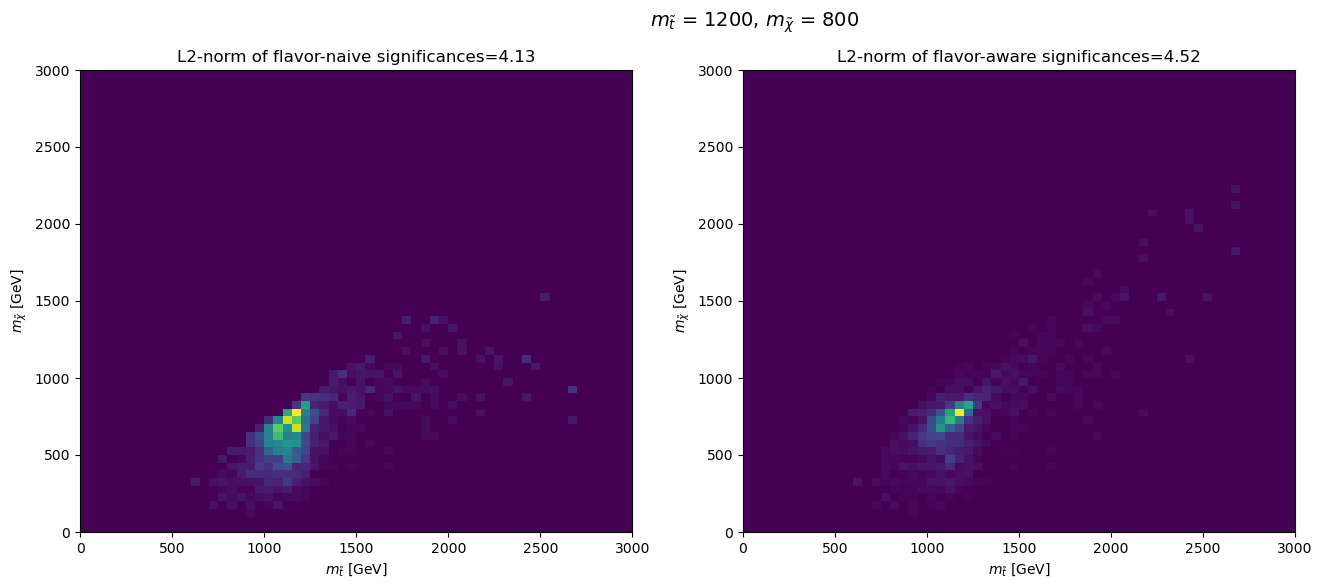

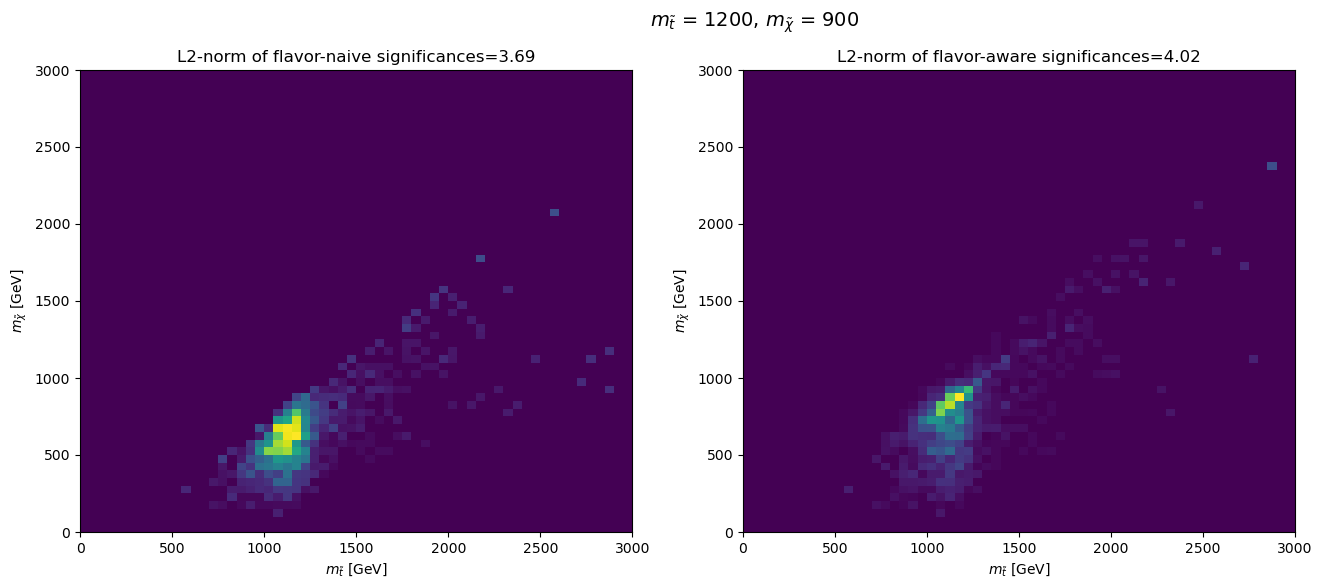

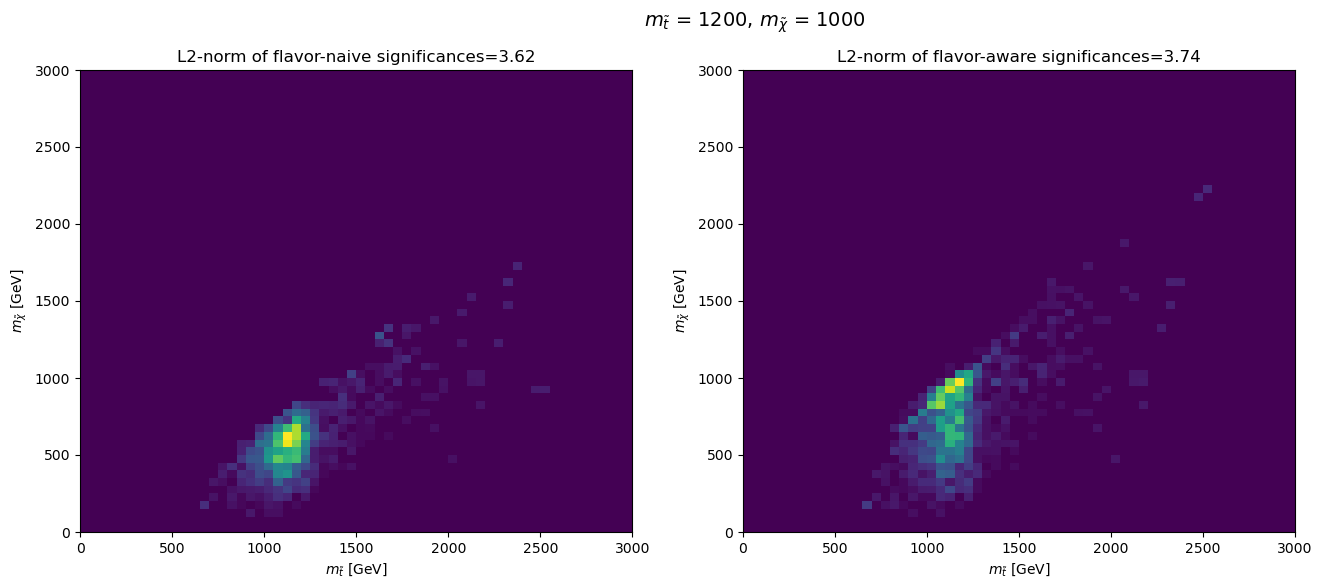

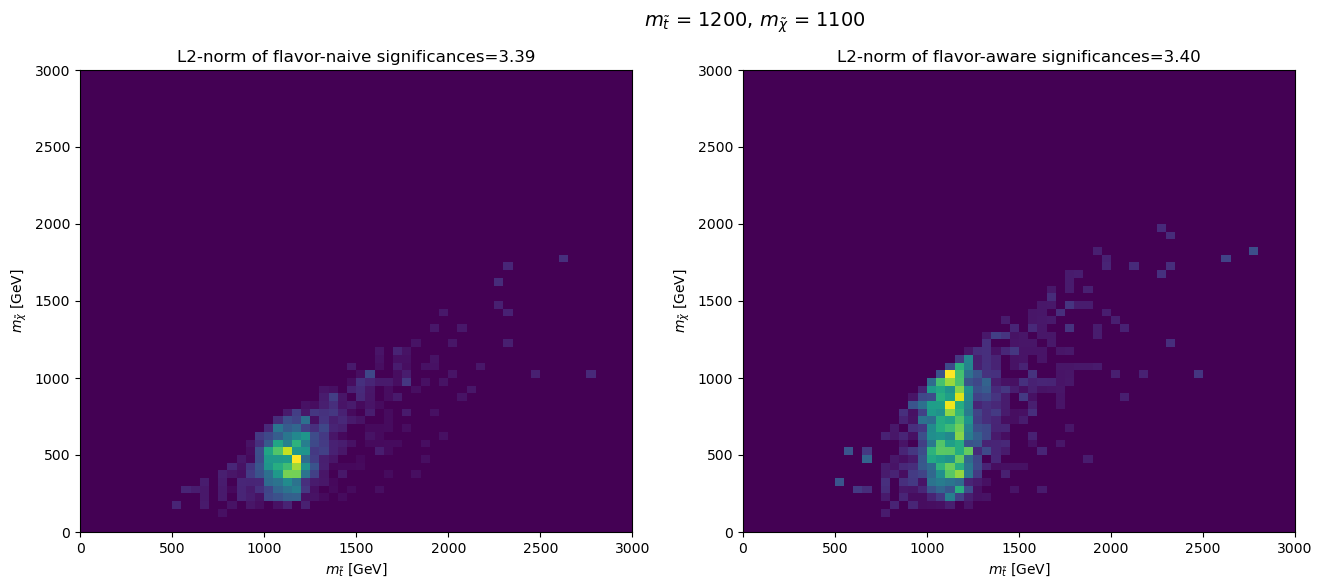

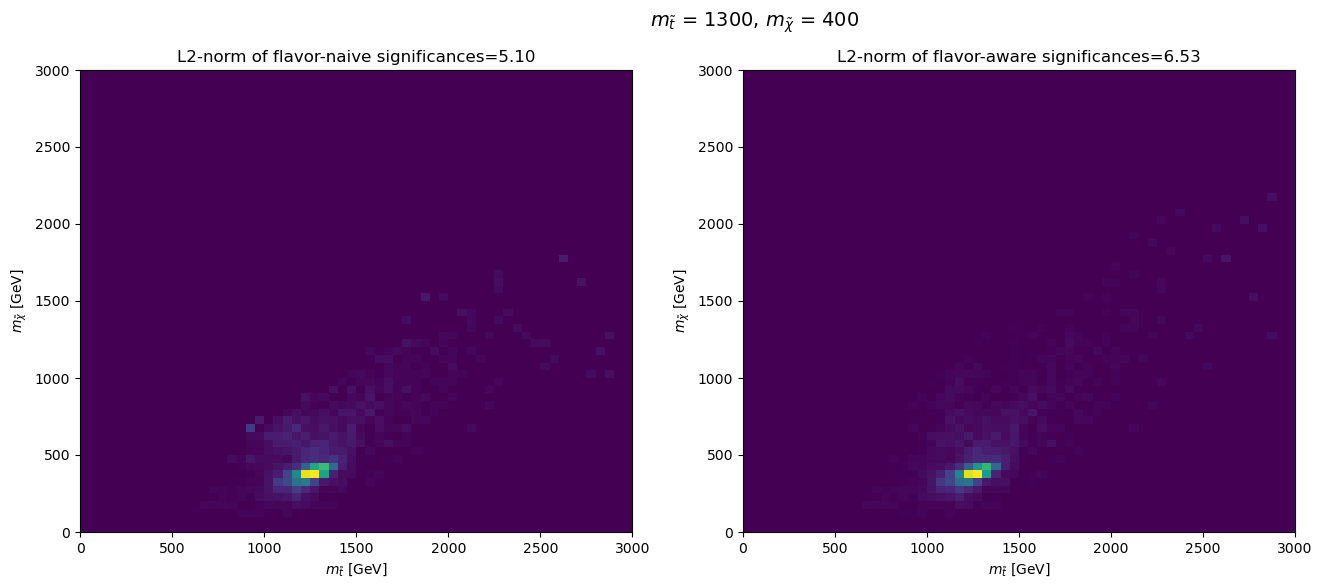

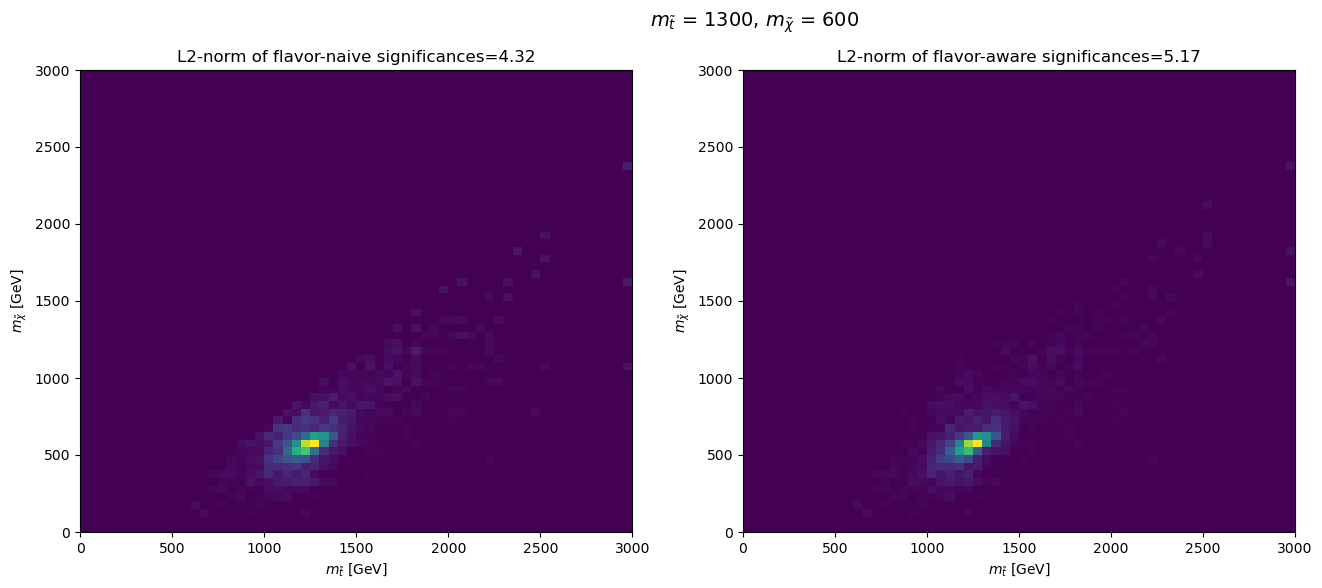

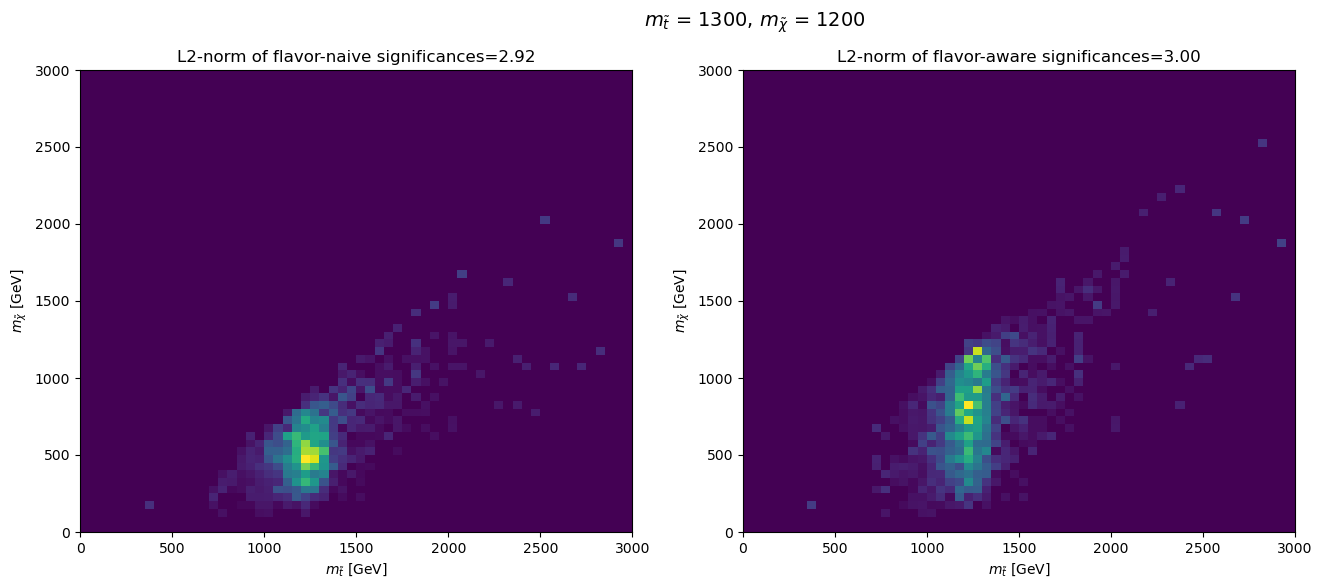

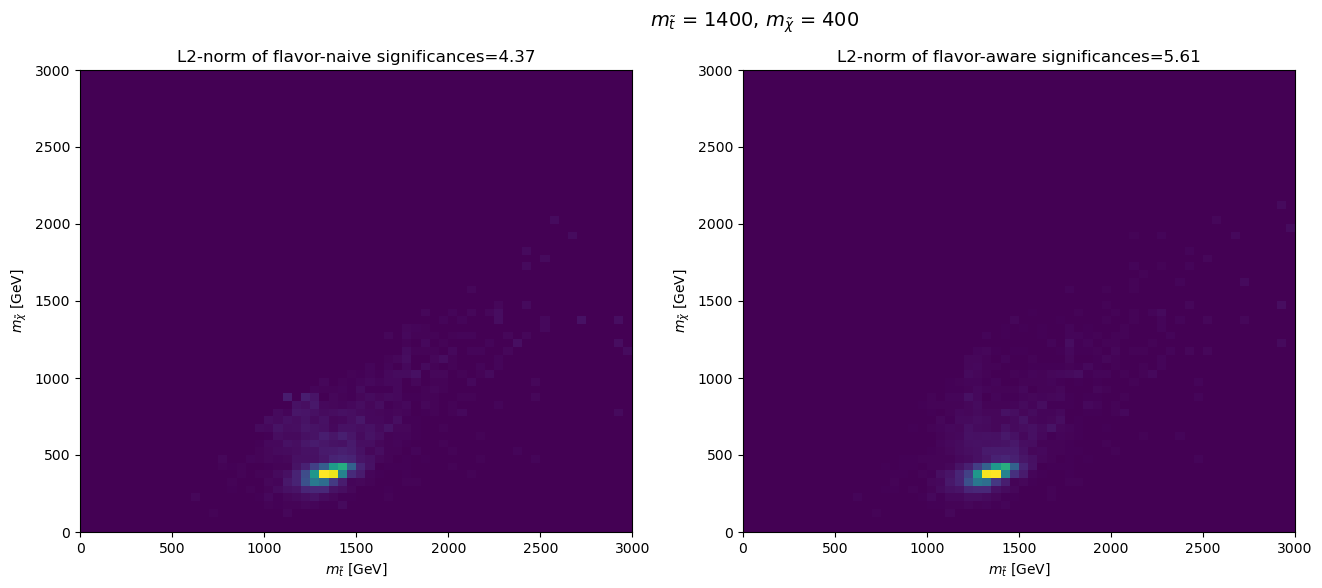

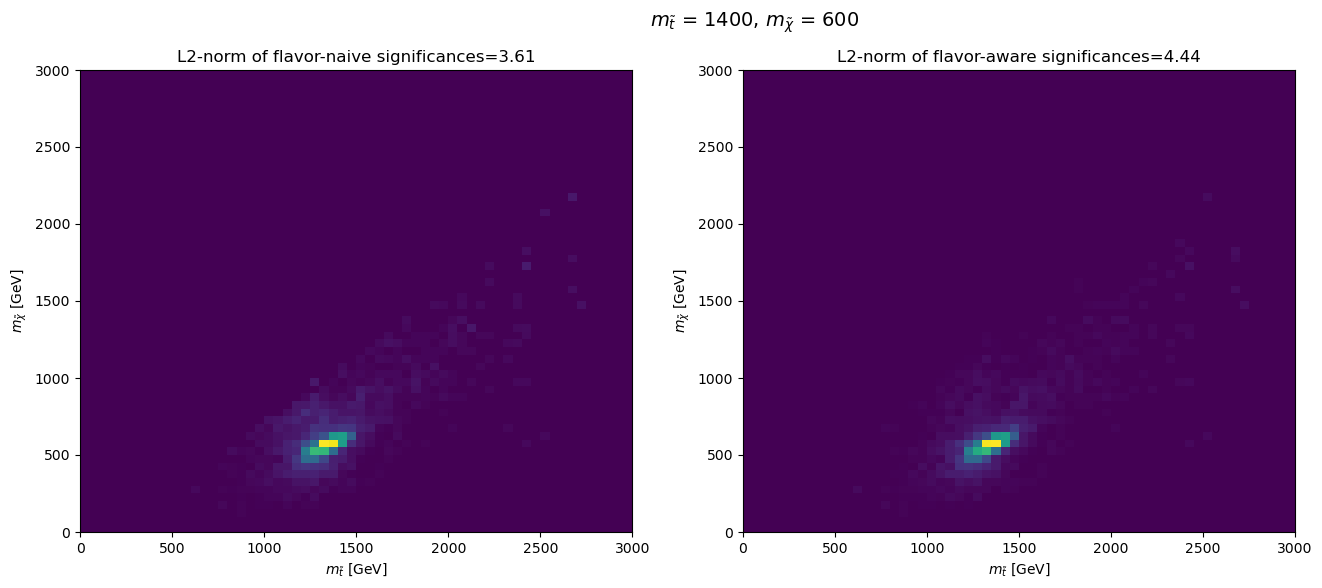

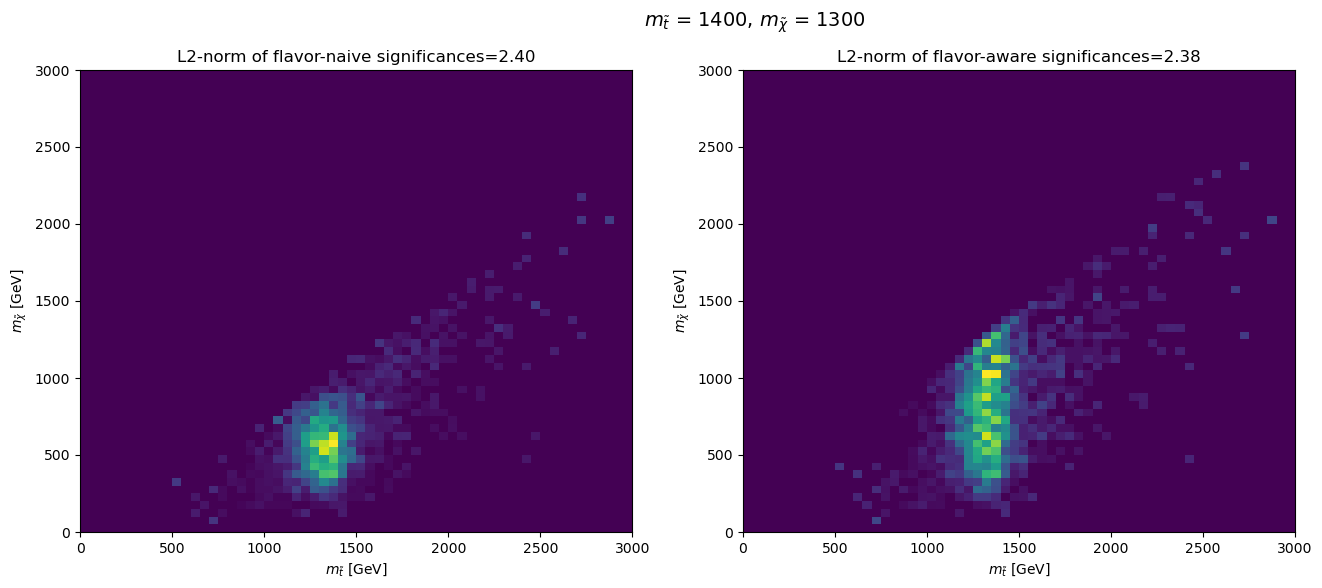

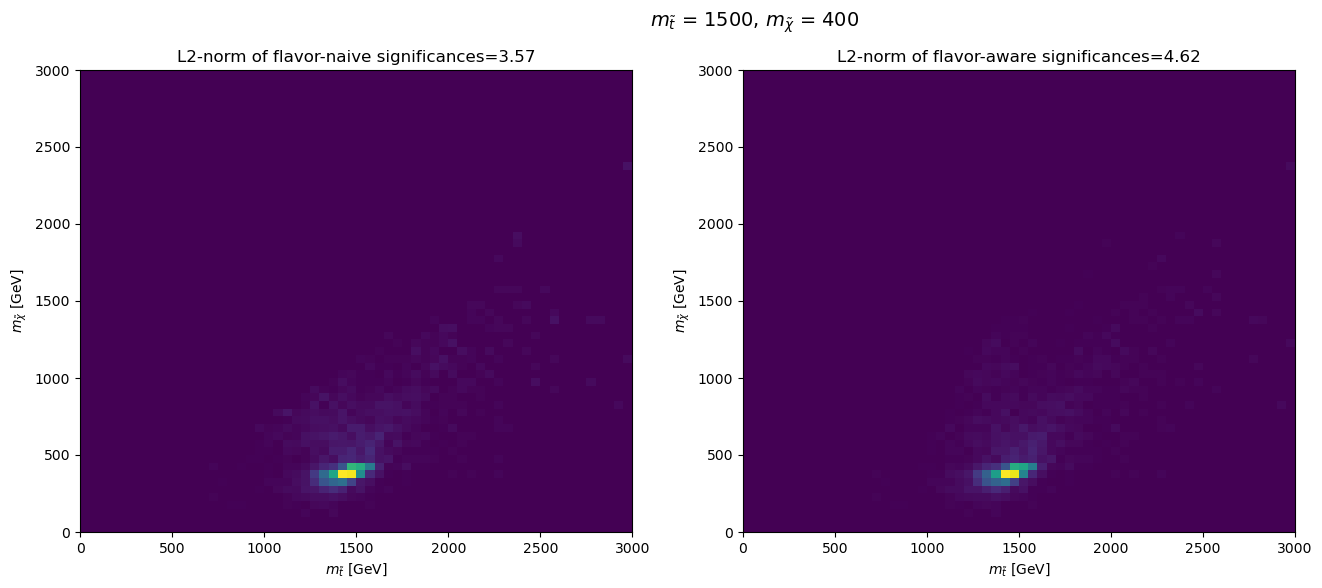

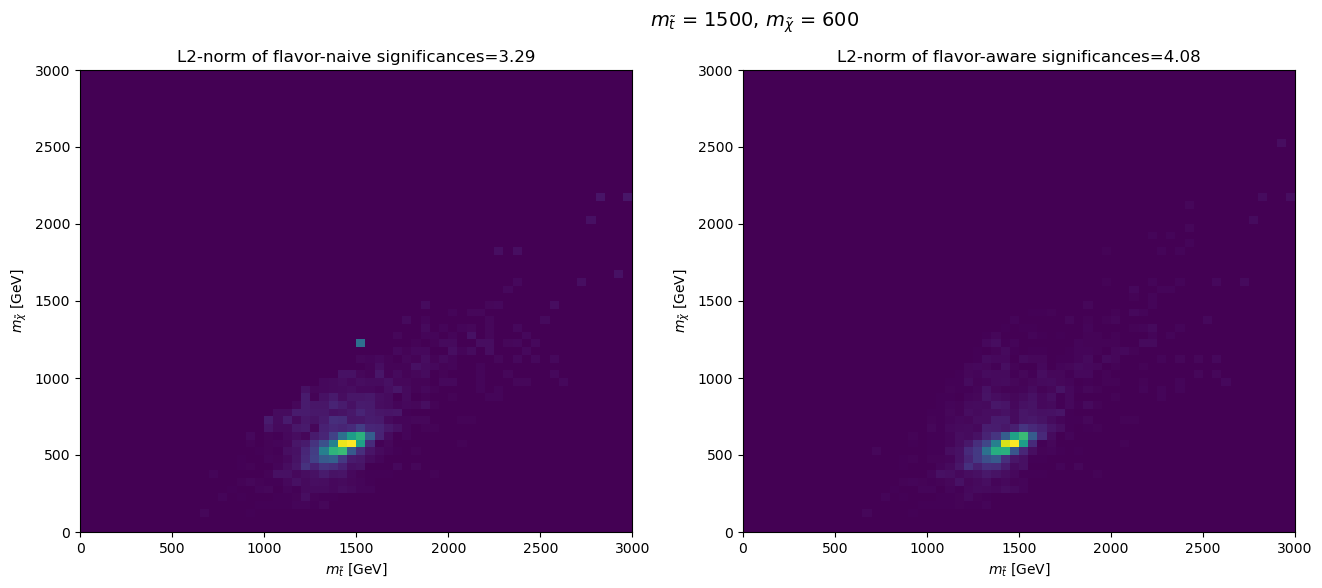

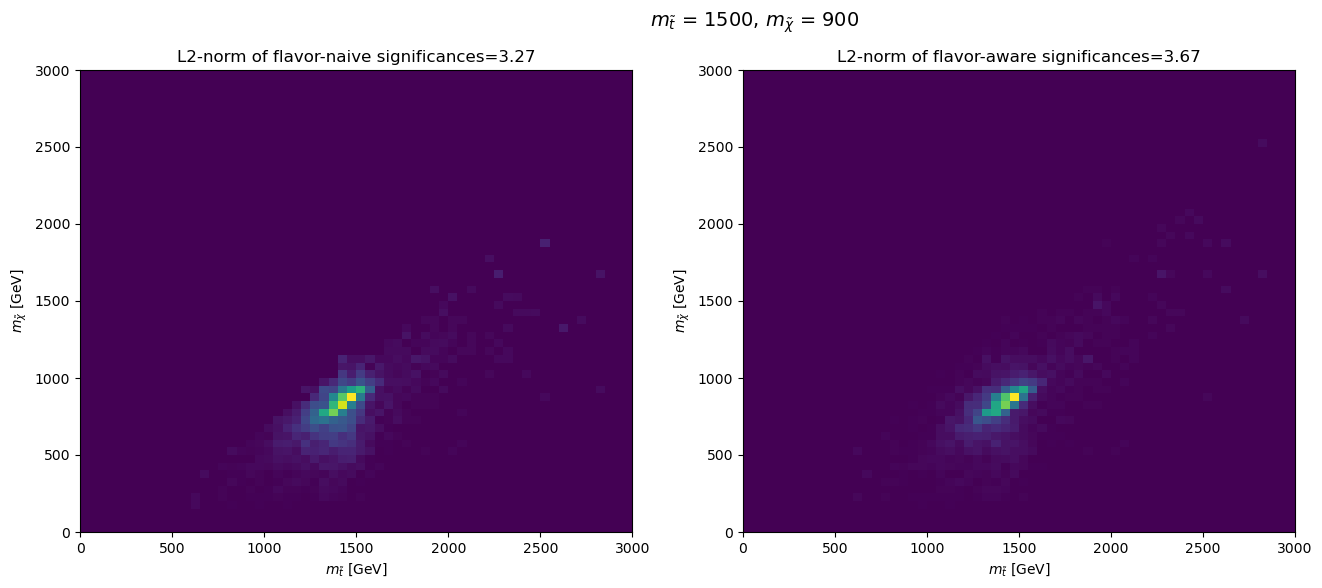

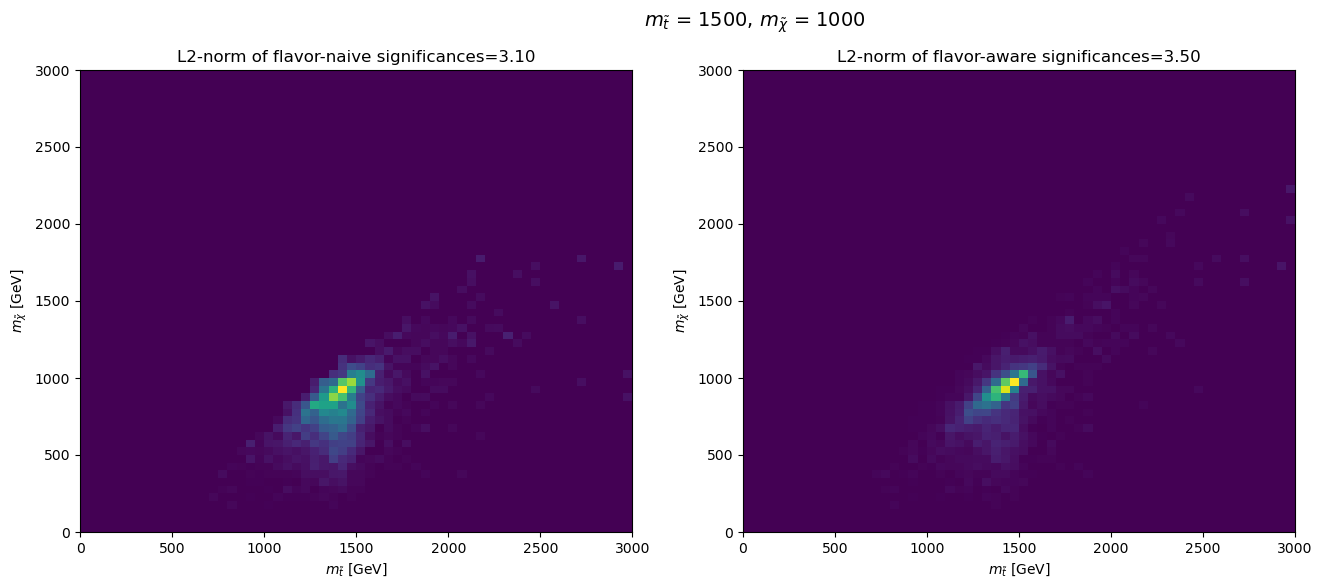

/srv/peakquality.py:40: RuntimeWarning: divide by zero encountered in divide
  quotient_term = np.nan_to_num(np.divide(signal_data, background_data), posinf=0, neginf=0)


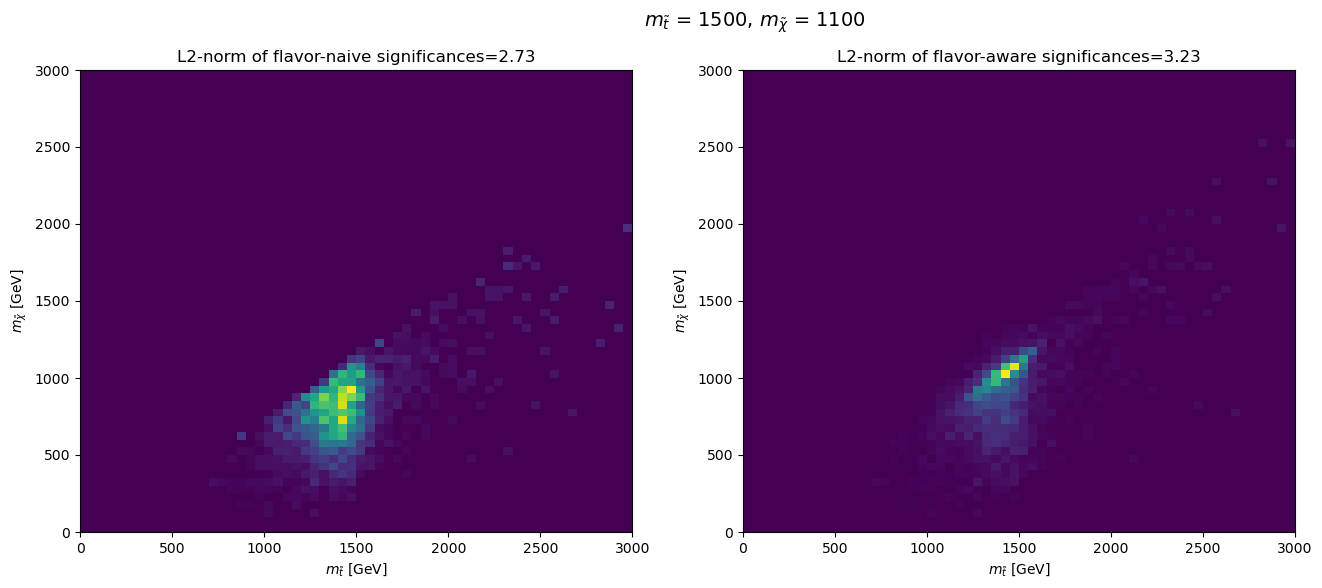

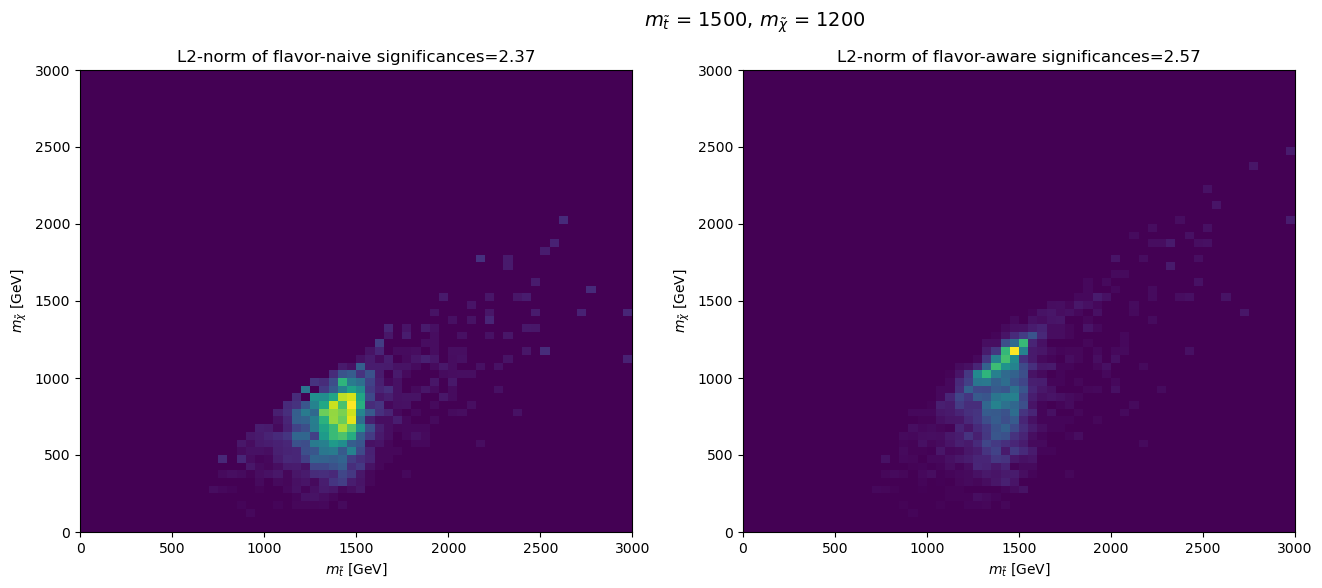

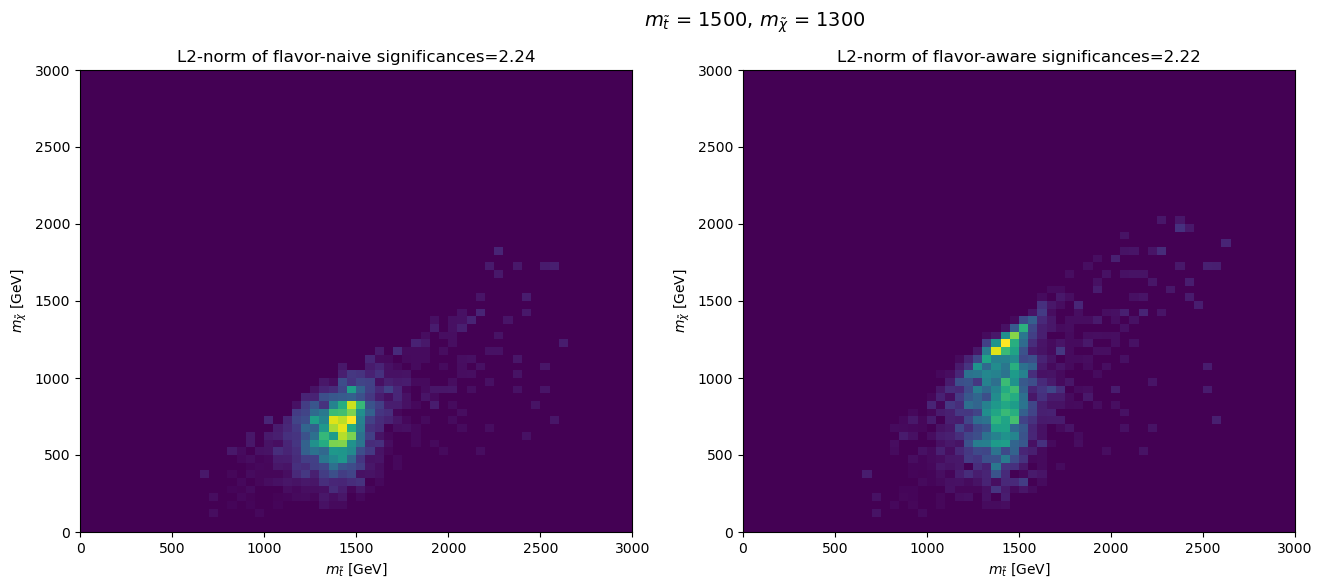

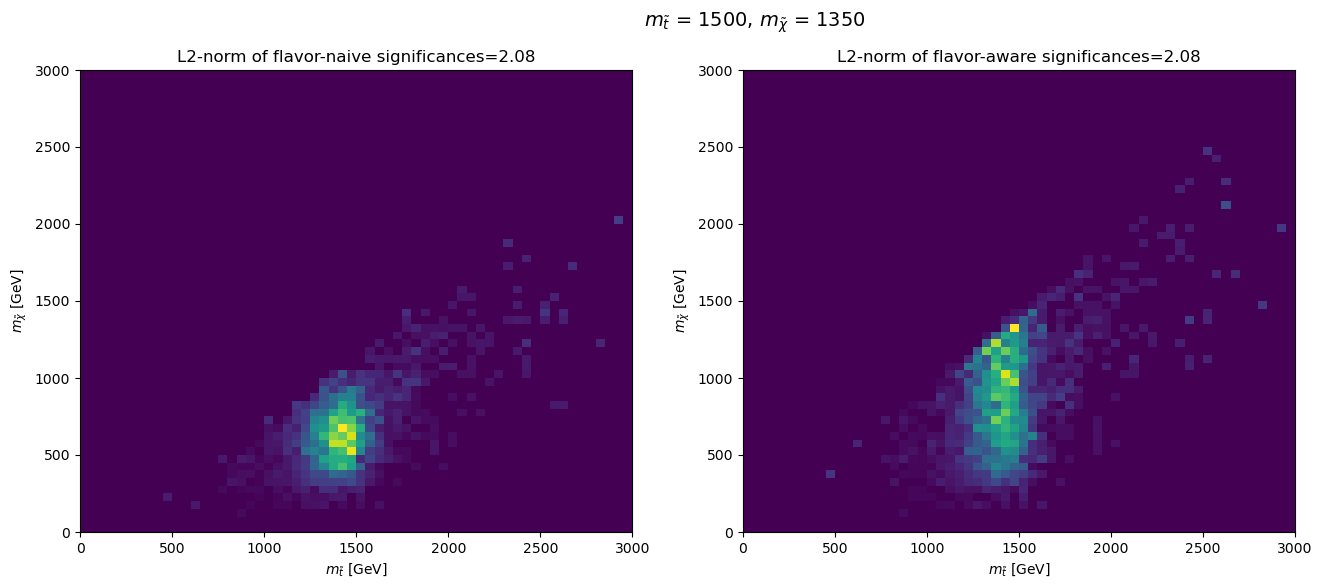

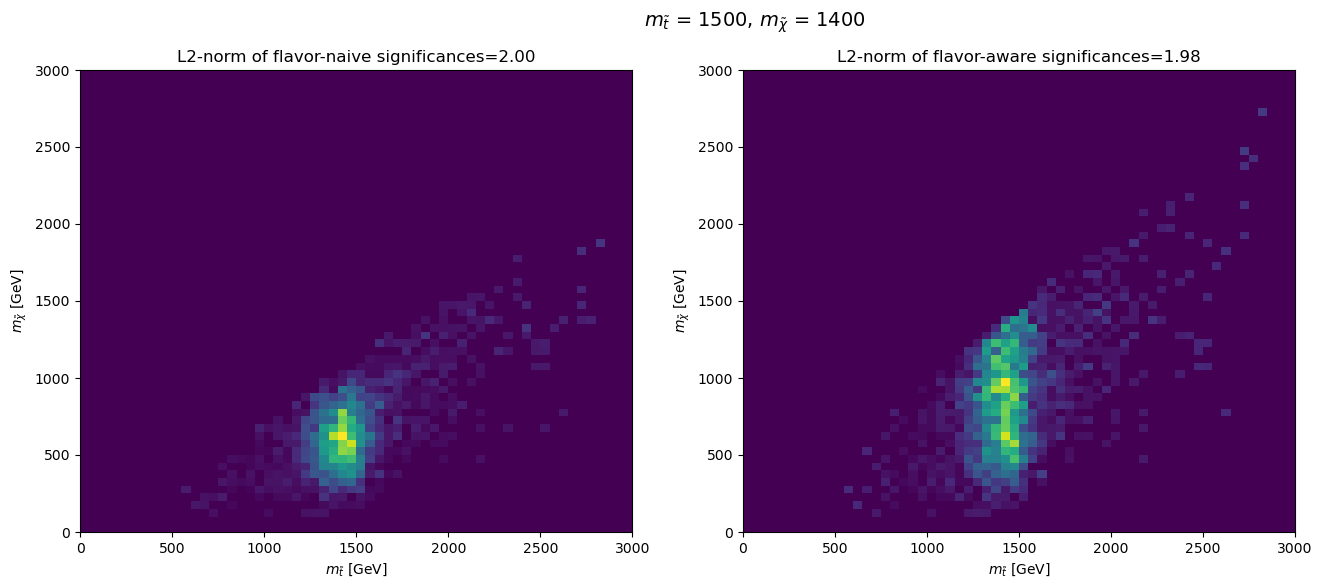

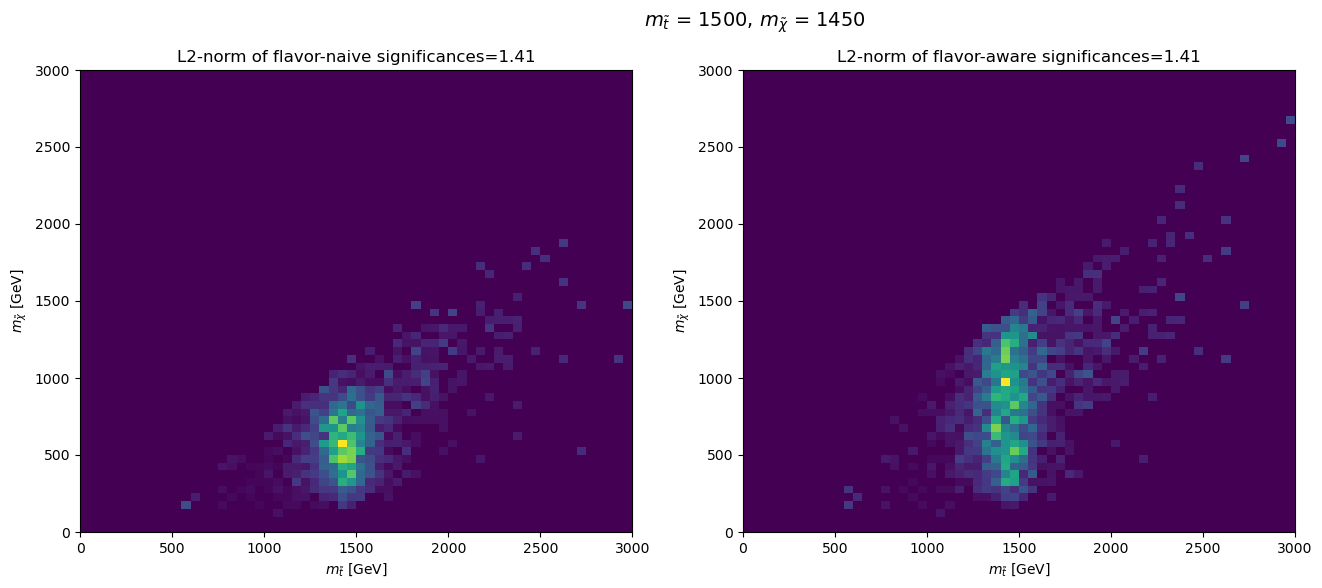

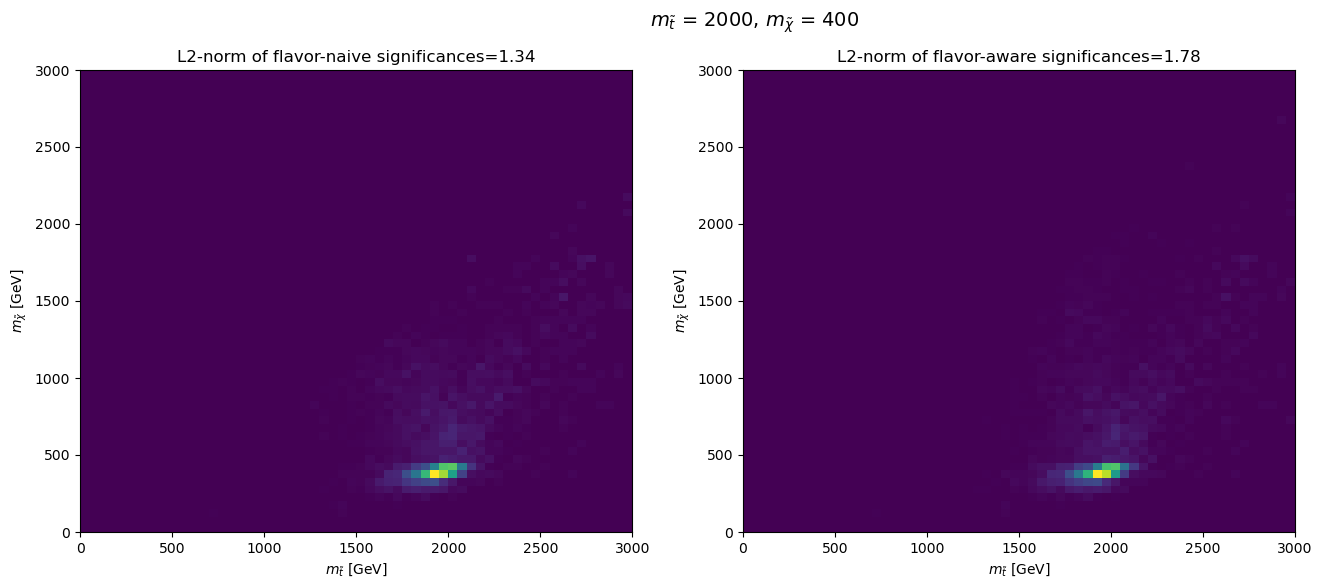

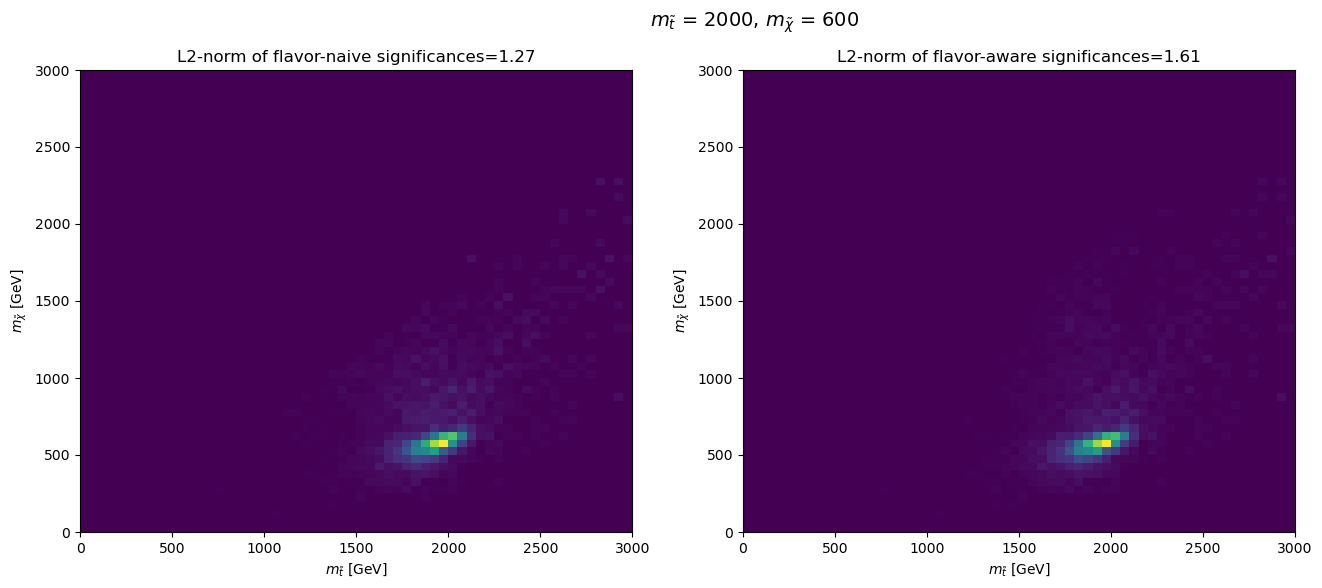

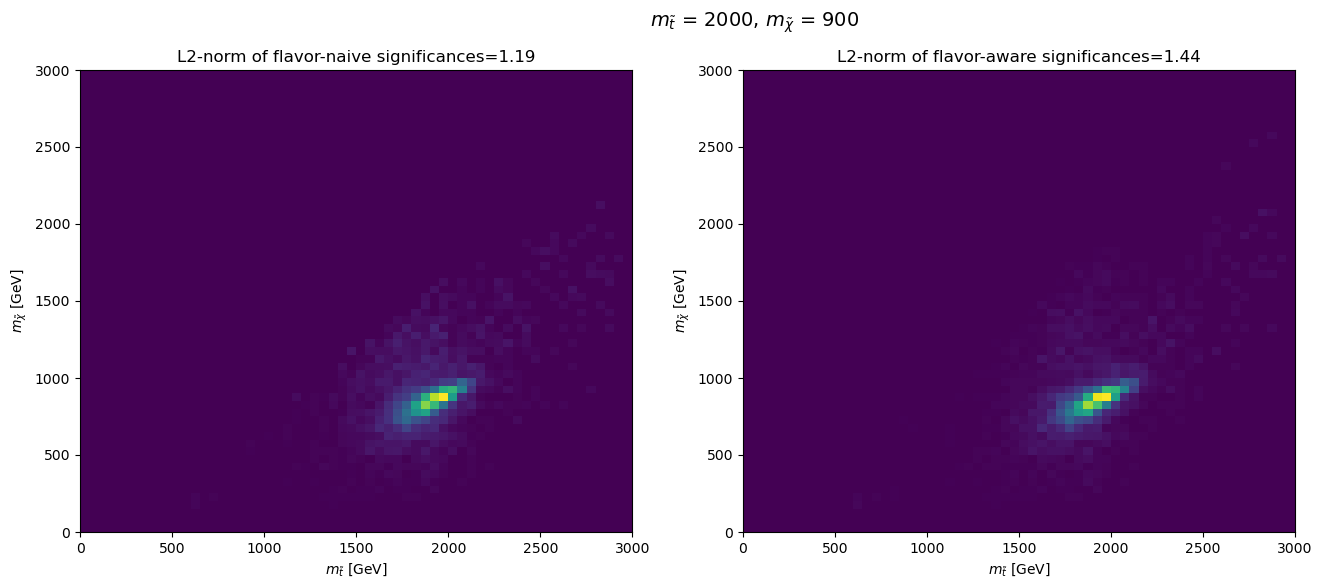

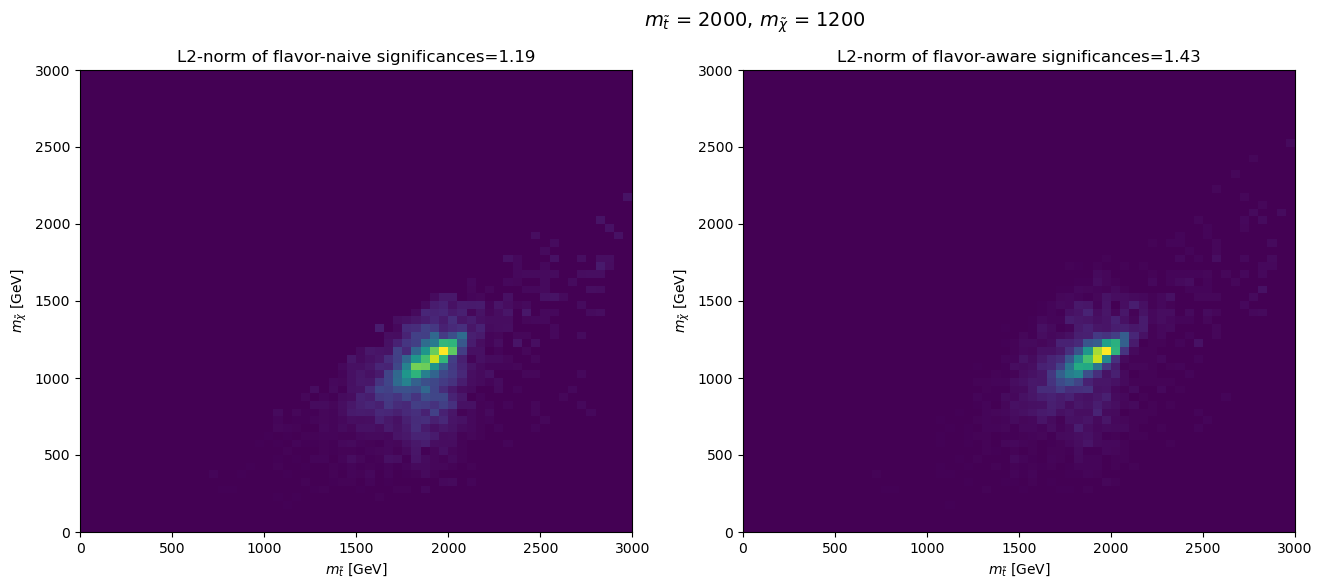

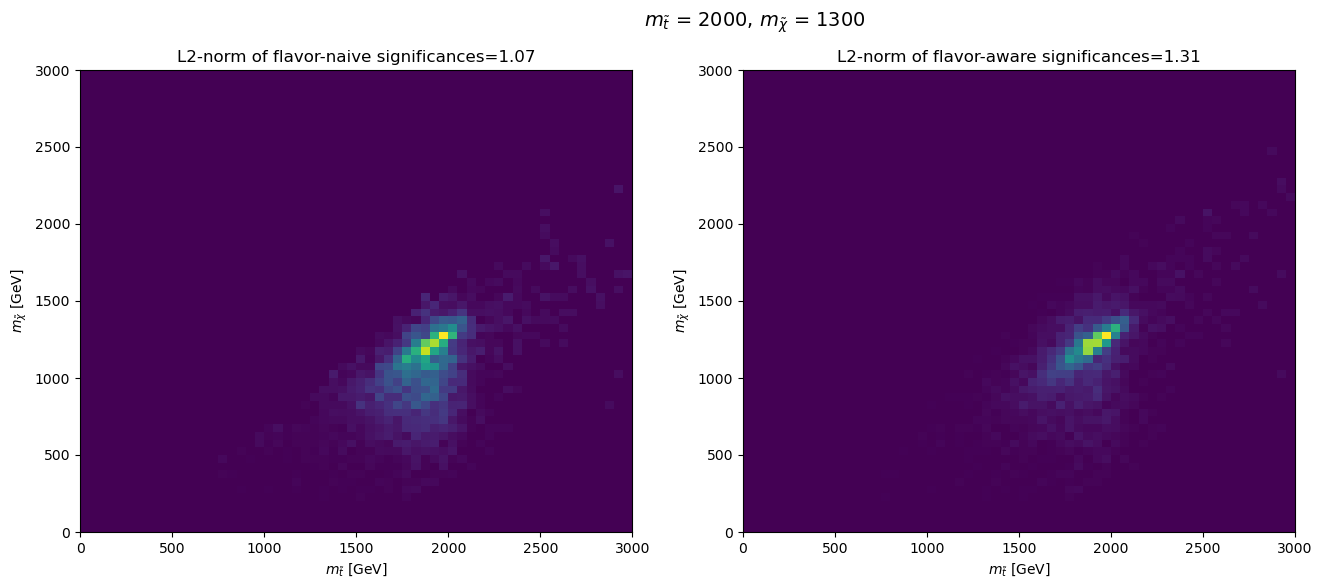

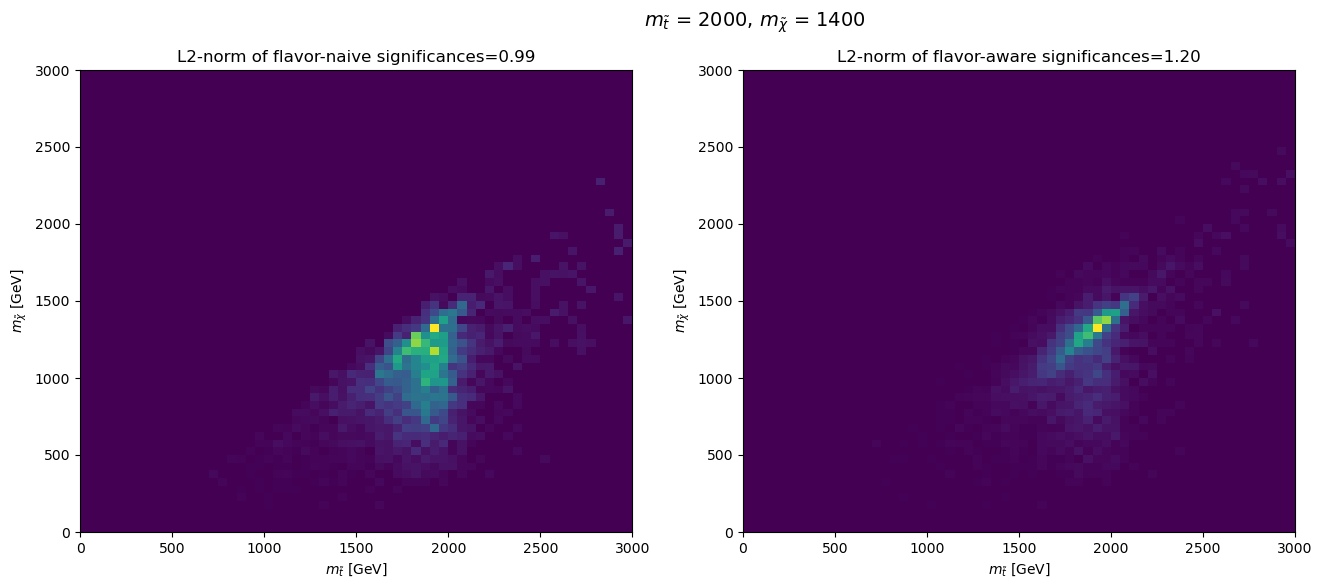

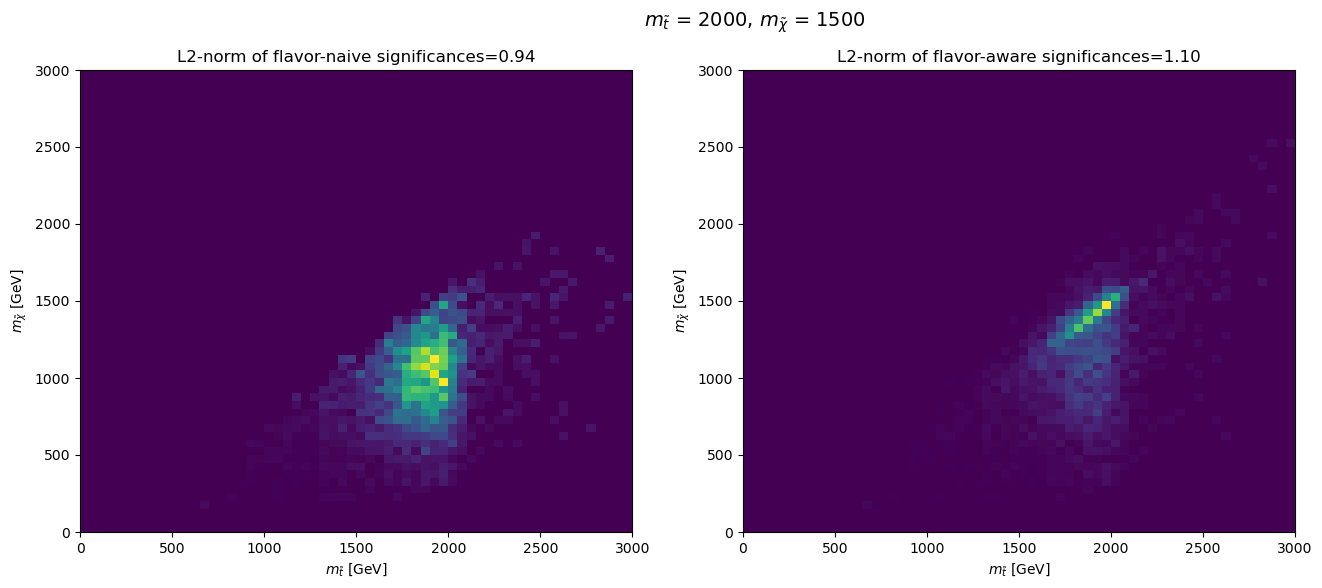

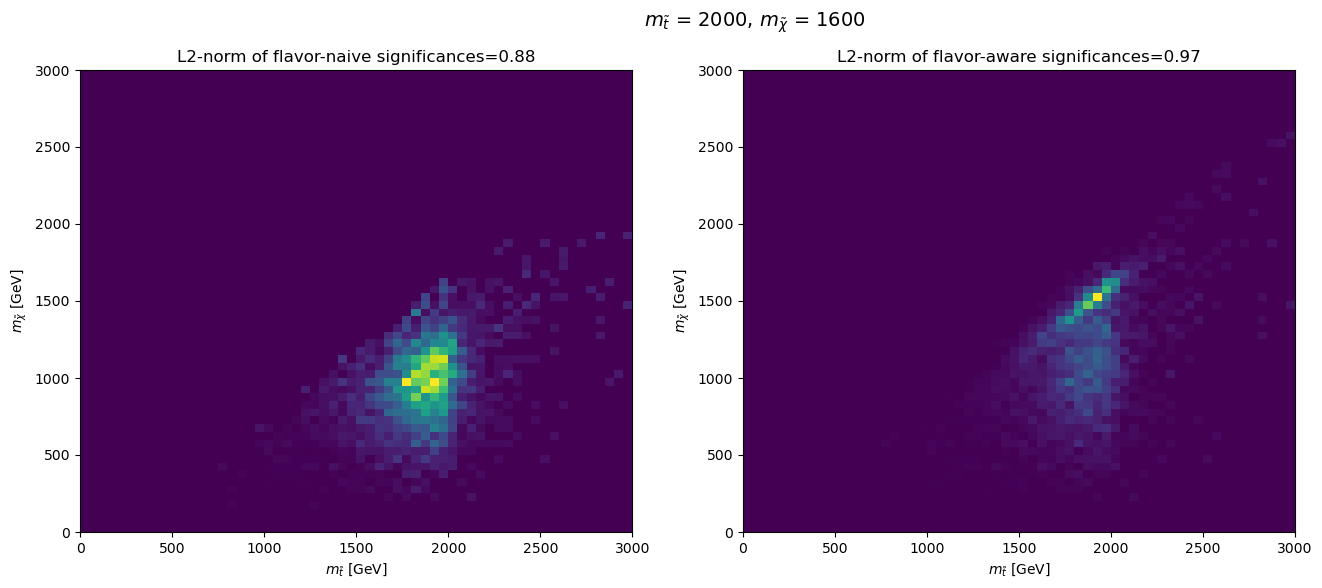

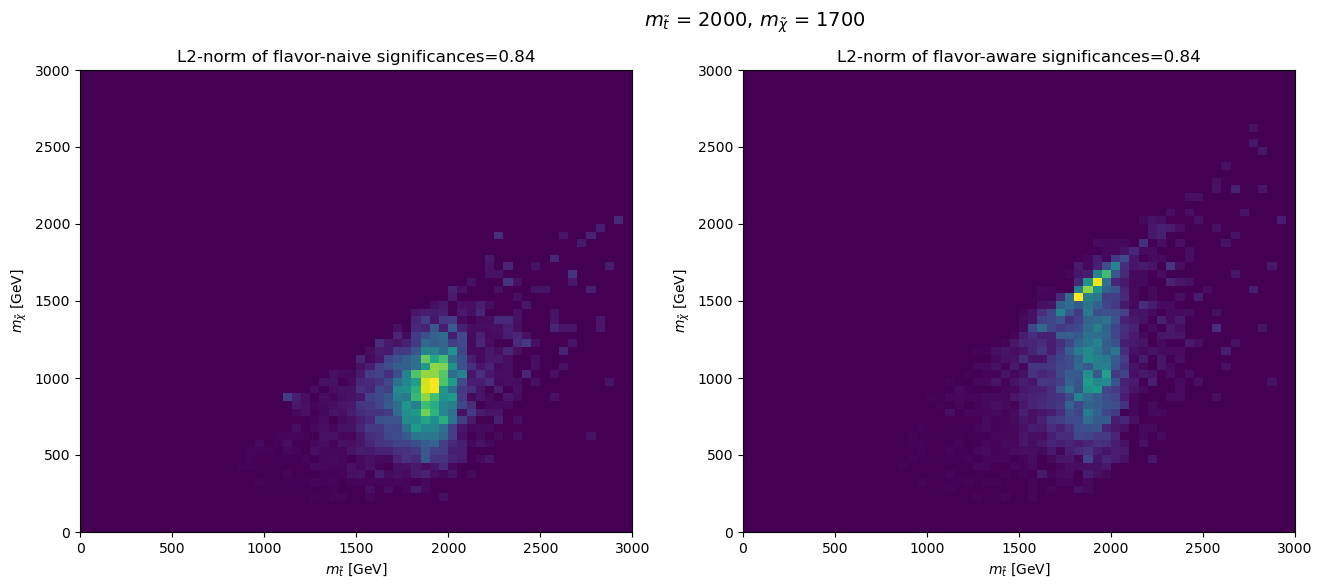

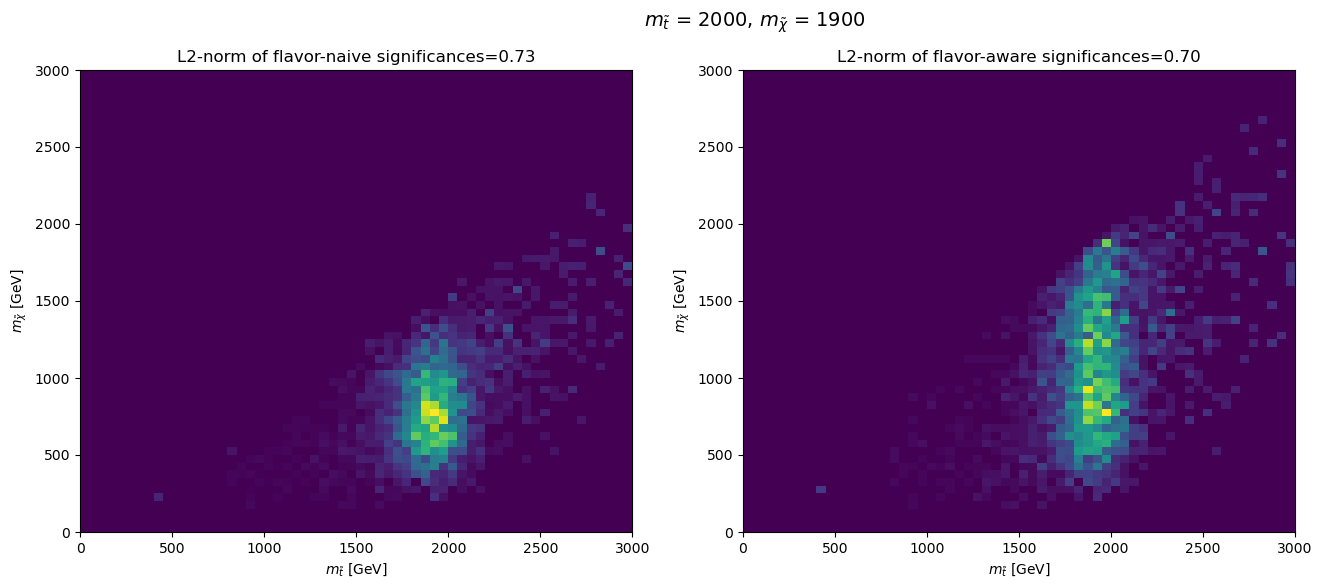

In [31]:
significances_over_mass_plane = []

plt.set_cmap("viridis")

for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    significance_naive, edges_x, edges_y, significance_points_naive = pq.significance_2D(hists, bg_hists, "m14_vs_m24")
    significance_aware, edges_x, edges_y, significance_points_aware = pq.significance_2D(hists, bg_hists, "m14_vs_m3_top_3_no_lead_b")
    
    significance_points_naive = np.rot90(np.fliplr(significance_points_naive))
    significance_points_aware = np.rot90(np.fliplr(significance_points_aware))
    significances_over_mass_plane.append((true_mtop, true_mchi, significance_naive, significance_aware))

    signal_style = s.getSet(signal).style
    fig, ax = plt.subplots(1, 2)
    plt.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}", fontsize=14)
    ax[0].title.set_text(f'L2-norm of flavor-naive significances={significance_naive:.2f}')
    ax[1].title.set_text(f'L2-norm of flavor-aware significances={significance_aware:.2f}')
    fig.set_figwidth(18)
    fig.set_figheight(6)

    ax[0].set_xlabel("$m_{{\\tilde{{t}}}}$ [GeV]")
    ax[0].set_ylabel("$m_{{\\tilde{{\\chi}}}}$ [GeV]")
    ax[1].set_xlabel("$m_{{\\tilde{{t}}}}$ [GeV]")
    ax[1].set_ylabel("$m_{{\\tilde{{\\chi}}}}$ [GeV]")
    cf_naive = ax[0].pcolormesh(edges_x, edges_y, significance_points_naive)
    cf_aware = ax[1].pcolormesh(edges_x, edges_y, significance_points_aware)

    fig.subplots_adjust(right=0.8)
    cbar = fig.colorbar(cf_naive, ax=ax.ravel().tolist())
    cbar.set_label("Significance")
    plt.show()

In [52]:
significances_over_mass_plane=np.array(significances_over_mass_plane)
significances_over_mass_plane[:, 3]/significances_over_mass_plane[:, 2]

array([1.19489421, 1.02326239, 1.17468665, 1.0951324 , 1.03187718,
       1.25371919, 1.11267304, 1.0531245 , 1.09455295, 1.08964448,
       1.0327749 , 1.00276476, 1.27932618, 1.19729614, 1.02682852,
       1.28345333, 1.23227332, 0.98969158, 1.29391957, 1.23909522,
       1.12270023, 1.13112319, 1.18380419, 1.08276629, 0.99079403,
       1.0002045 , 0.99305107, 0.99667327, 1.32432817, 1.26569168,
       1.21268129, 1.20012454, 1.21566742, 1.2145522 , 1.17001732,
       1.09552564, 0.99896174, 0.9535404 ])

## Backgrounds

Look at the sculpting on the right!!

<Figure size 640x480 with 0 Axes>

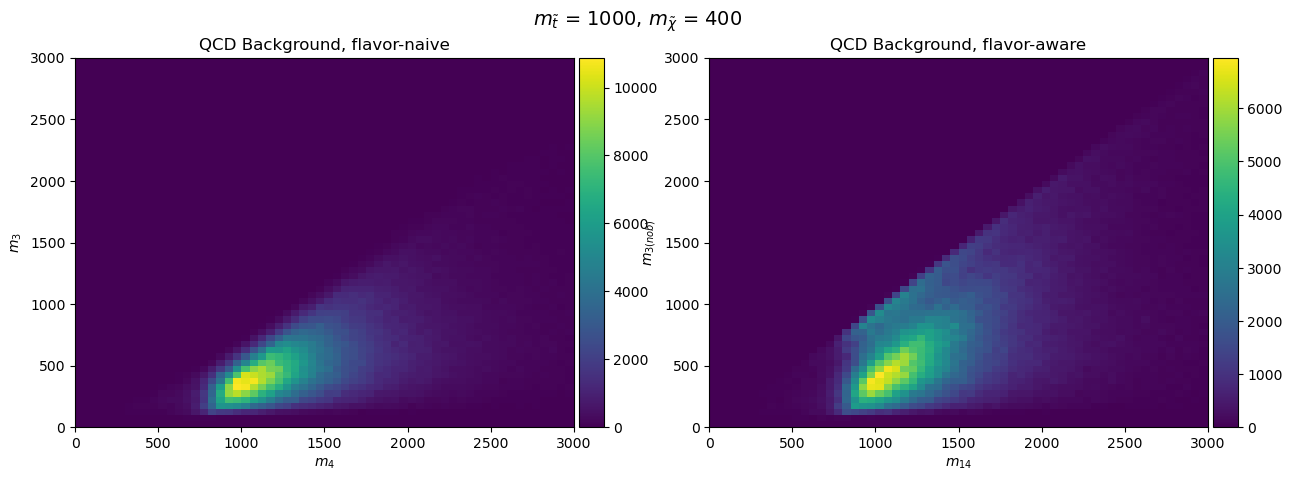

In [37]:
plt.set_cmap("viridis")
signal='signal_312_1000_400'
hists = a.results[signal].getScaledHistograms(s, None)
signal_name_parts = signal.split('_')
true_mtop = int(signal_name_parts[-2])
true_mchi = int(signal_name_parts[-1])

bg_hist_naive = bg_hists["m14_vs_m24"]
bg_hist_aware = bg_hists["m14_vs_m3_top_3_no_lead_b"]
bg_obj_naive = PlotObject.fromHist(bg_hist_naive)
bg_obj_aware = PlotObject.fromHist(bg_hist_aware)

signal_style = s.getSet(signal).style
fig, ax = plt.subplots(1, 2)
plt.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}", fontsize=14)
ax[0].title.set_text('QCD Background, flavor-naive')
ax[1].title.set_text('QCD Background, flavor-aware')
fig.set_figwidth(15)

drawAs2DHist(ax[0], bg_obj_naive)
drawAs2DHist(ax[1], bg_obj_aware)
plt.show()

In [39]:
sculpted_events = bg_hist_aware.axes

(Regular(60, 0, 3000, name='$m_{14}$'),
 Regular(60, 0, 3000, name='$m_{3 (no b)}$'))

## Signals

<Figure size 640x480 with 0 Axes>

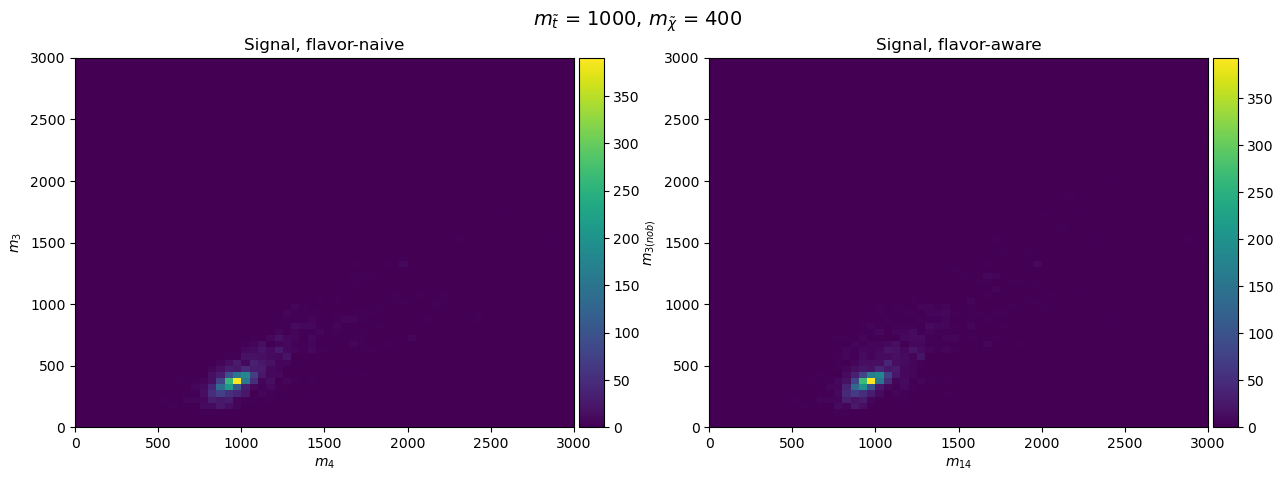

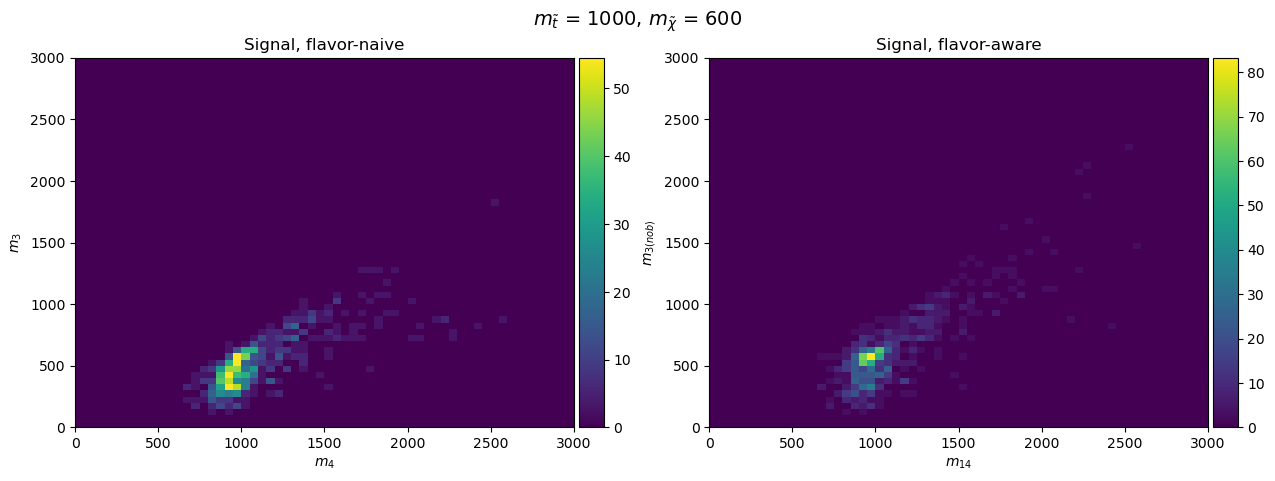

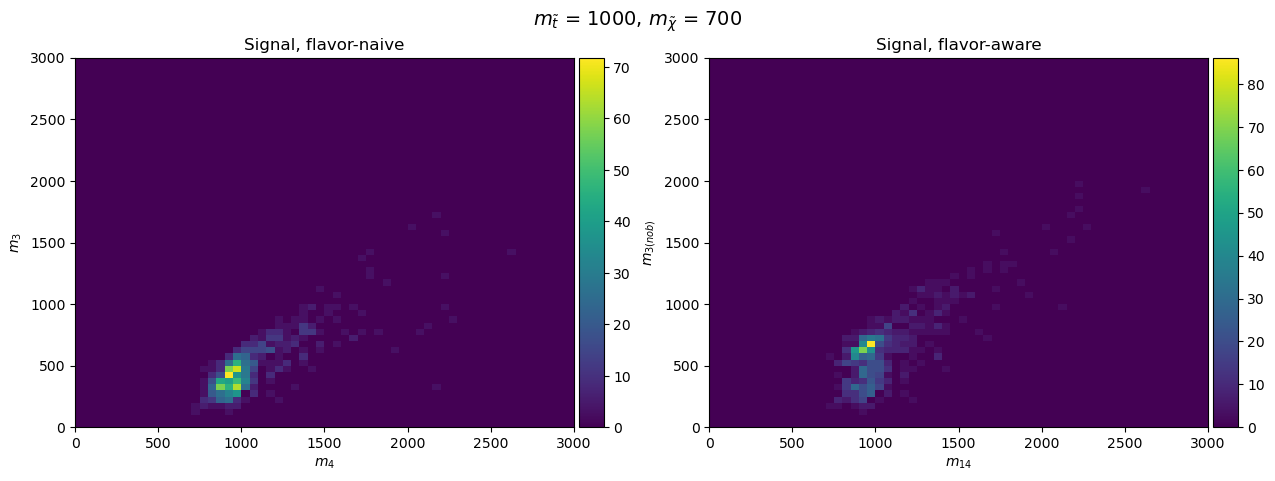

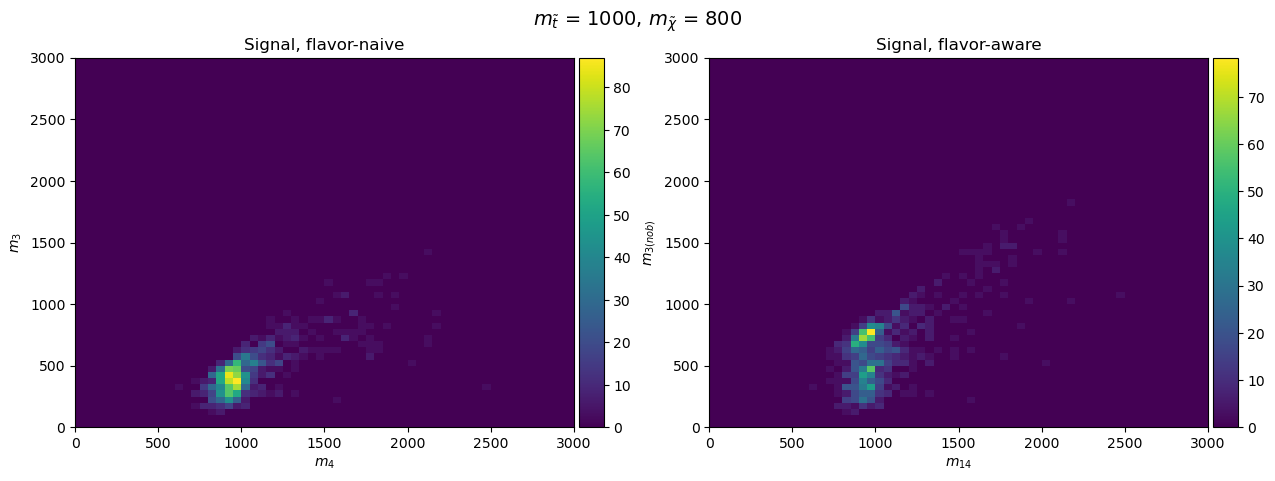

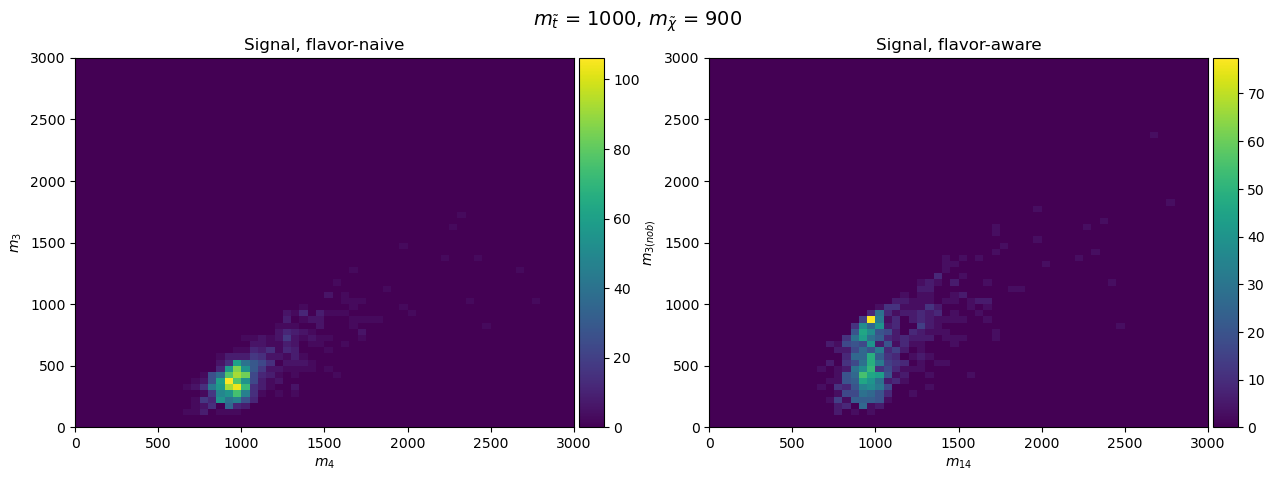

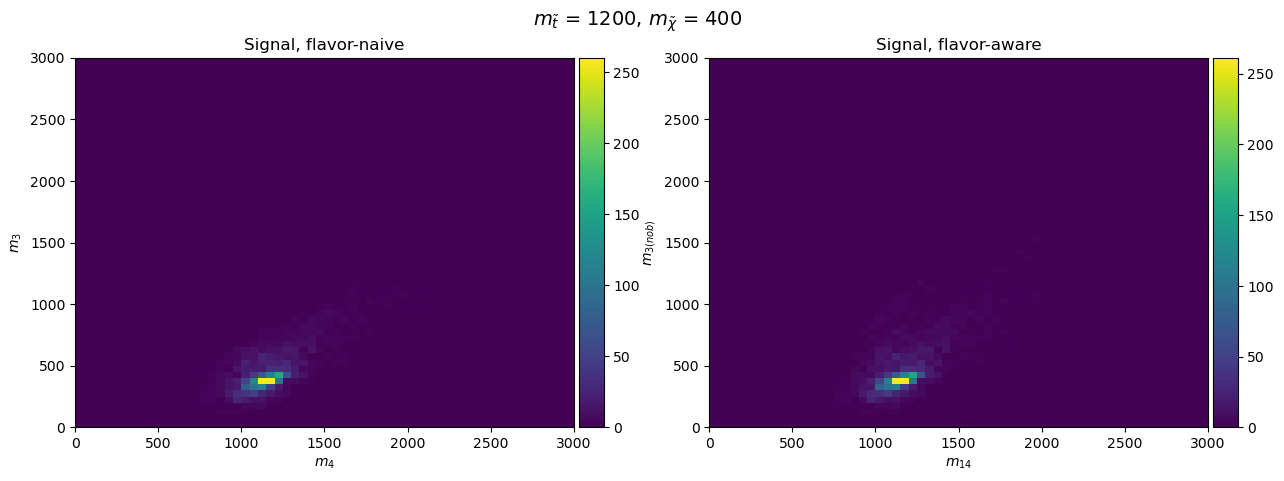

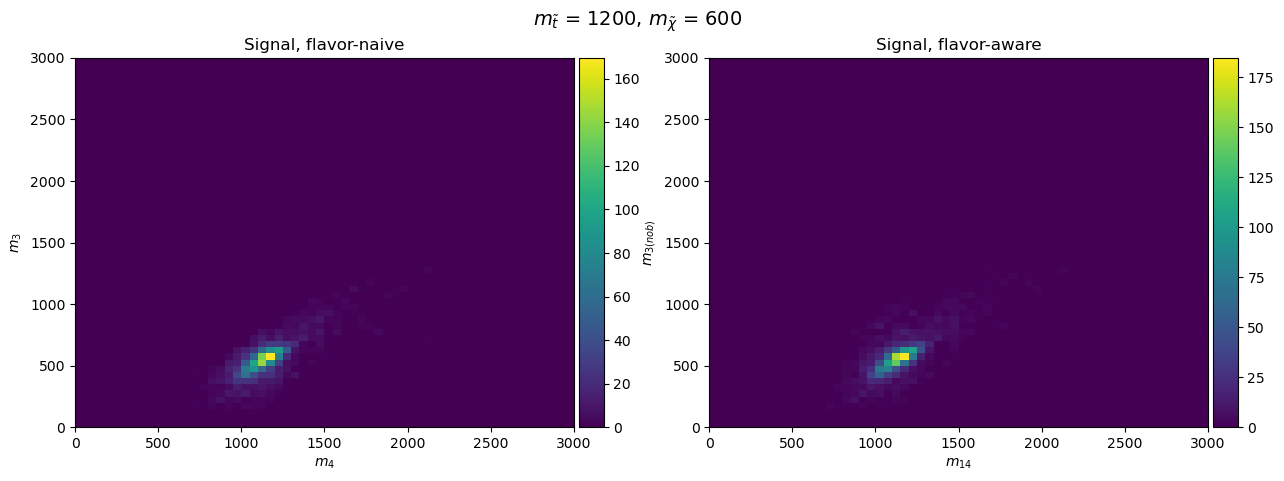

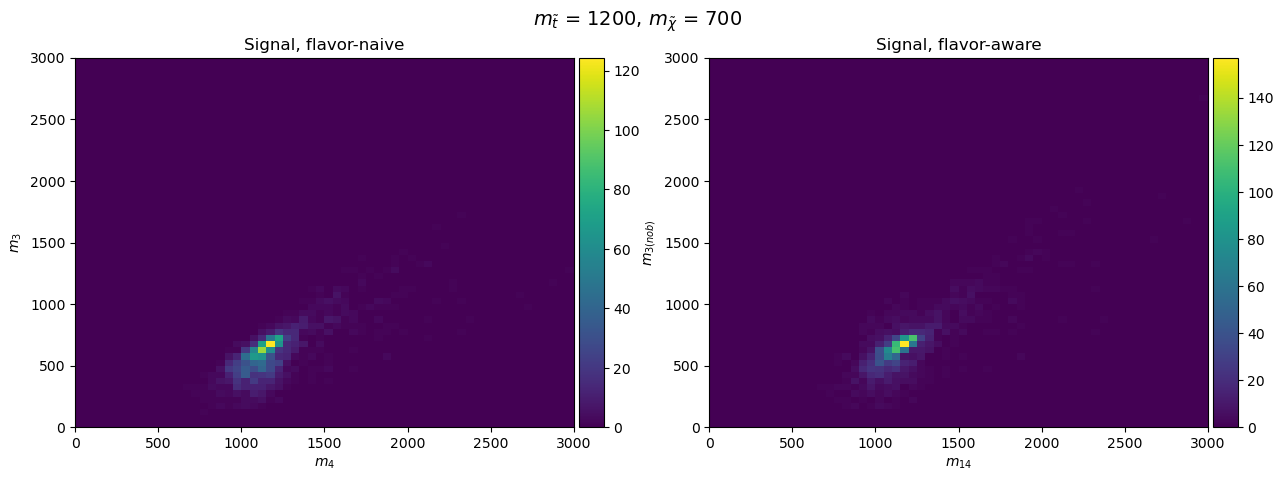

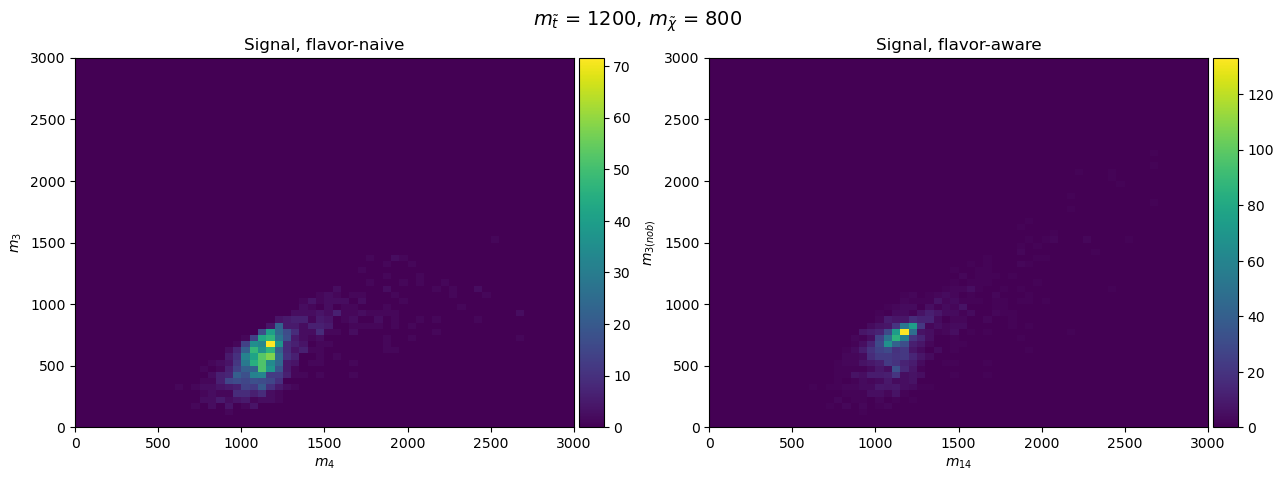

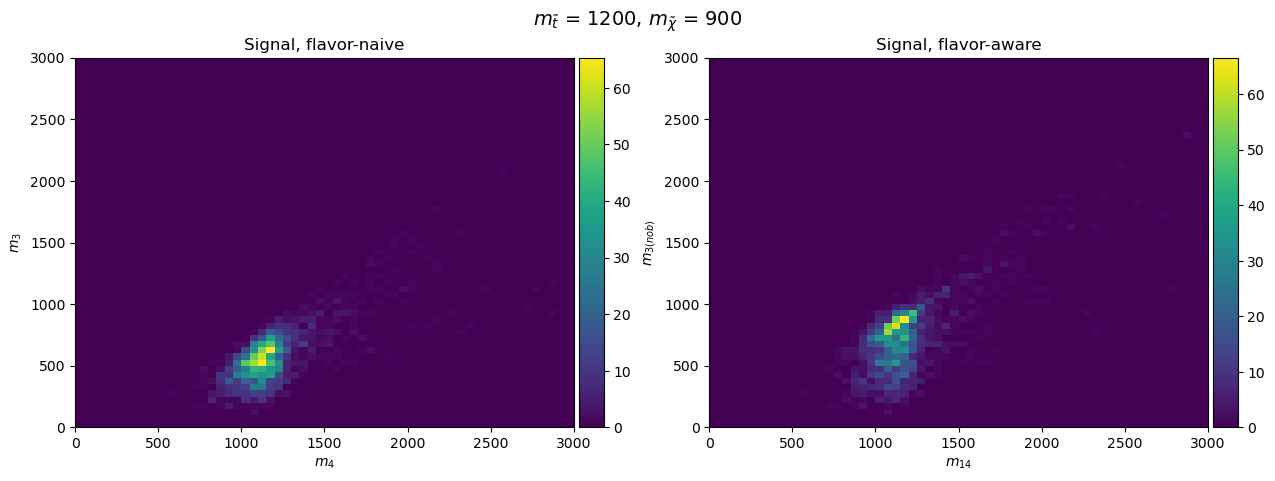

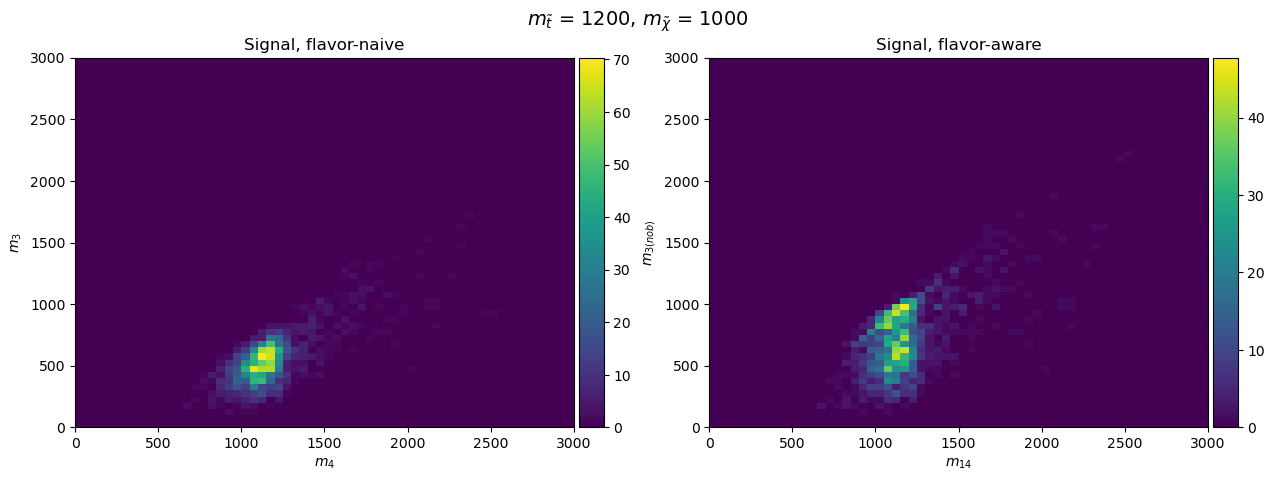

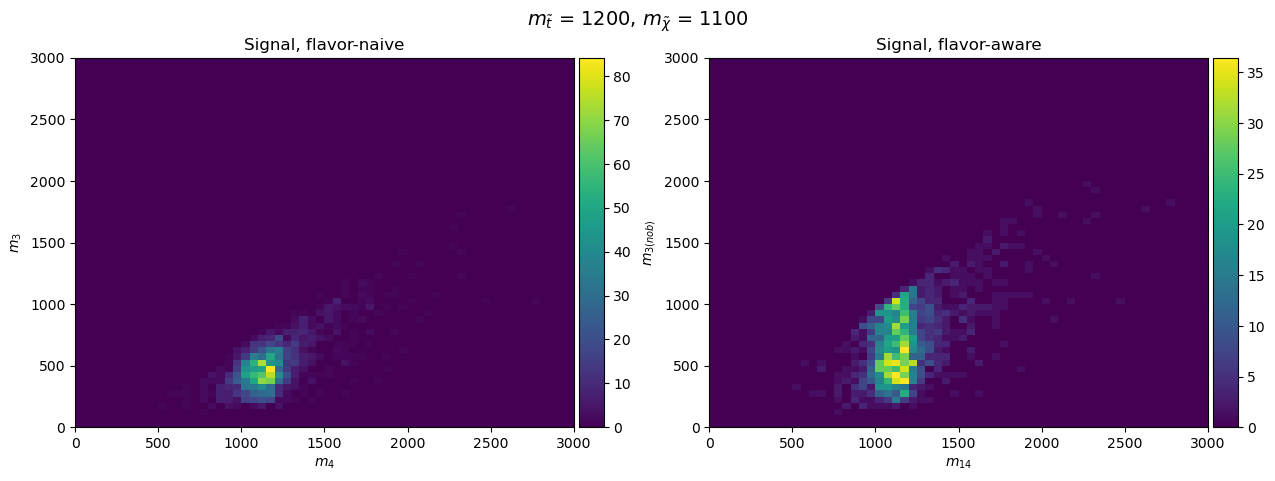

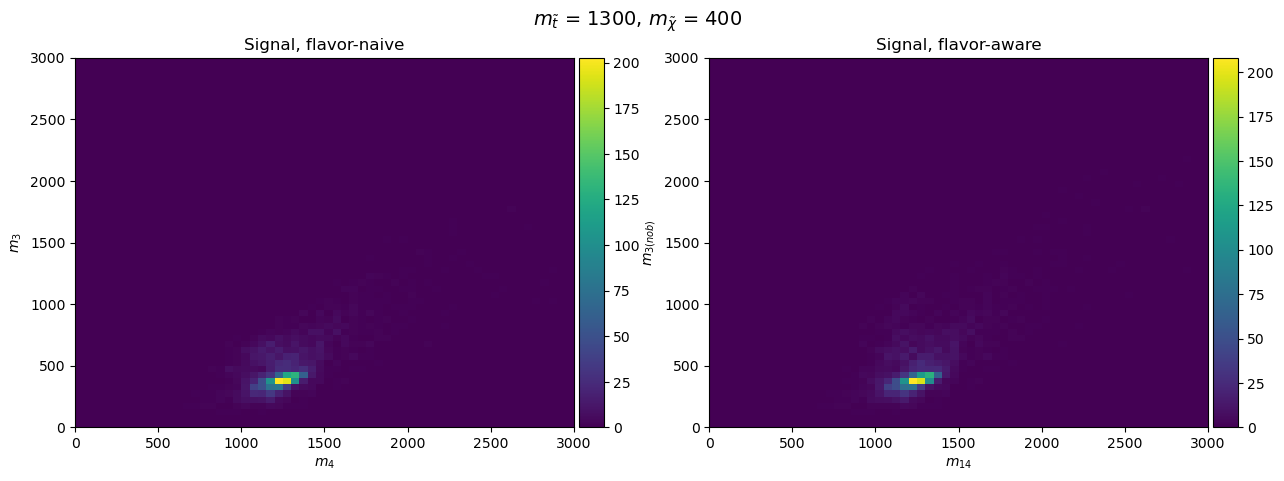

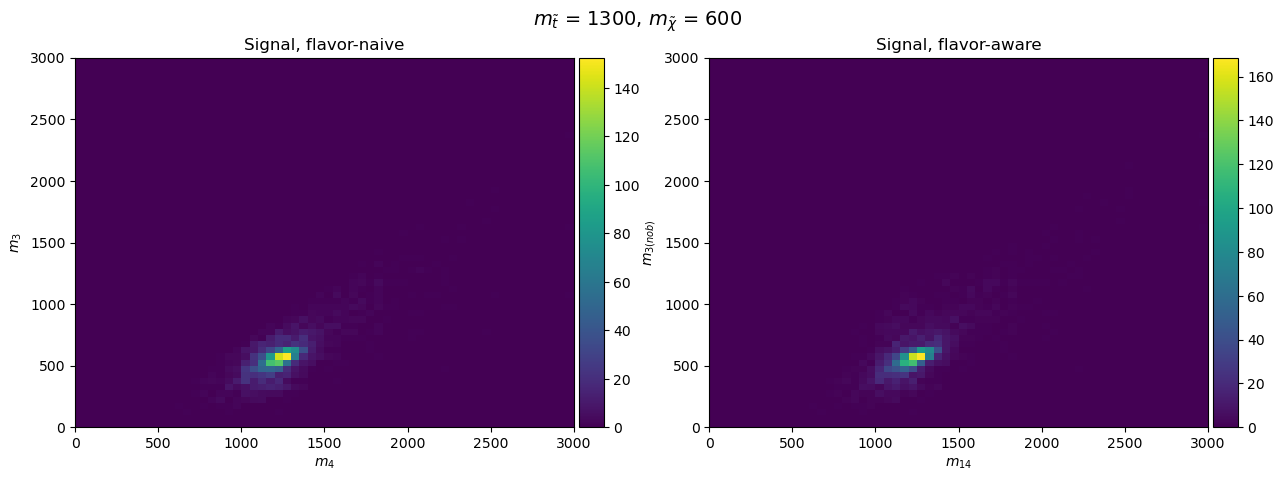

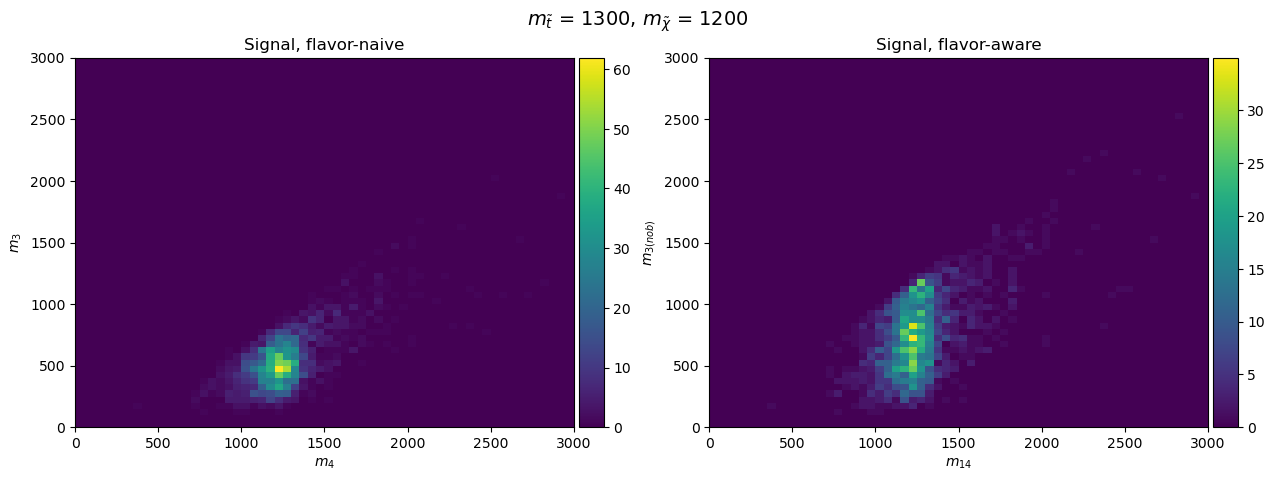

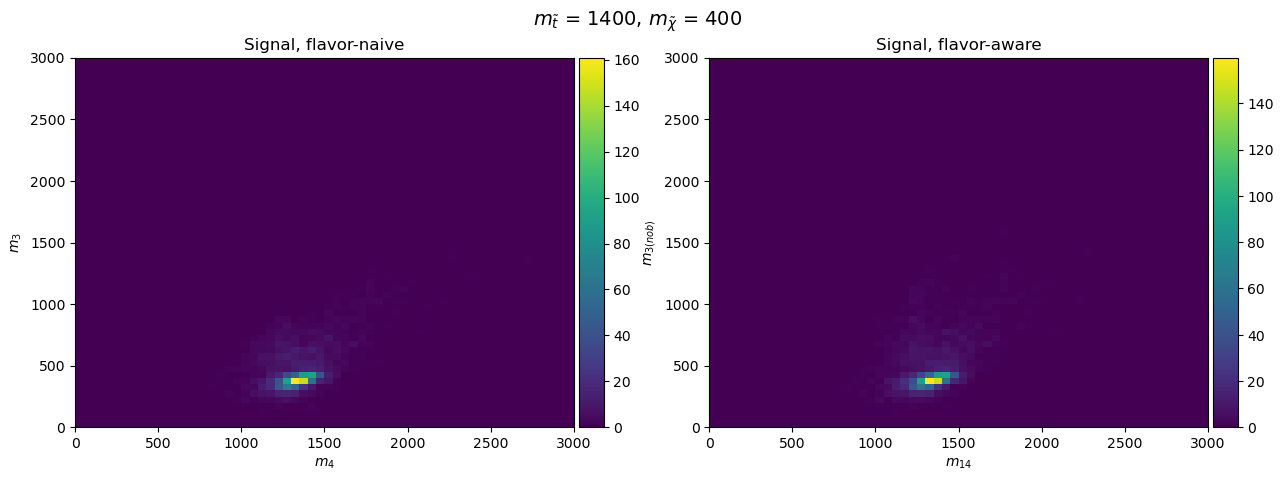

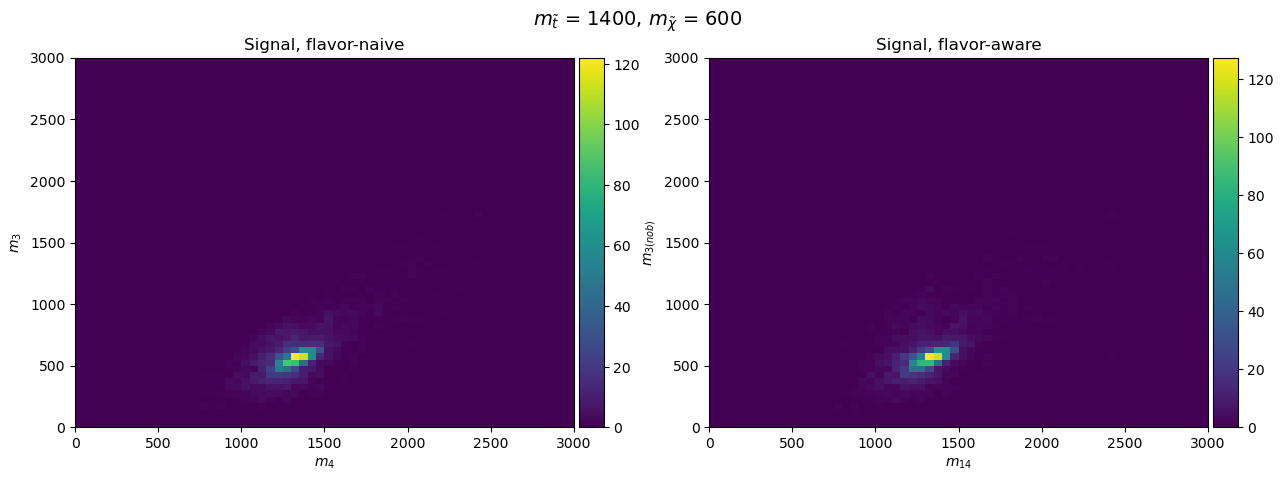

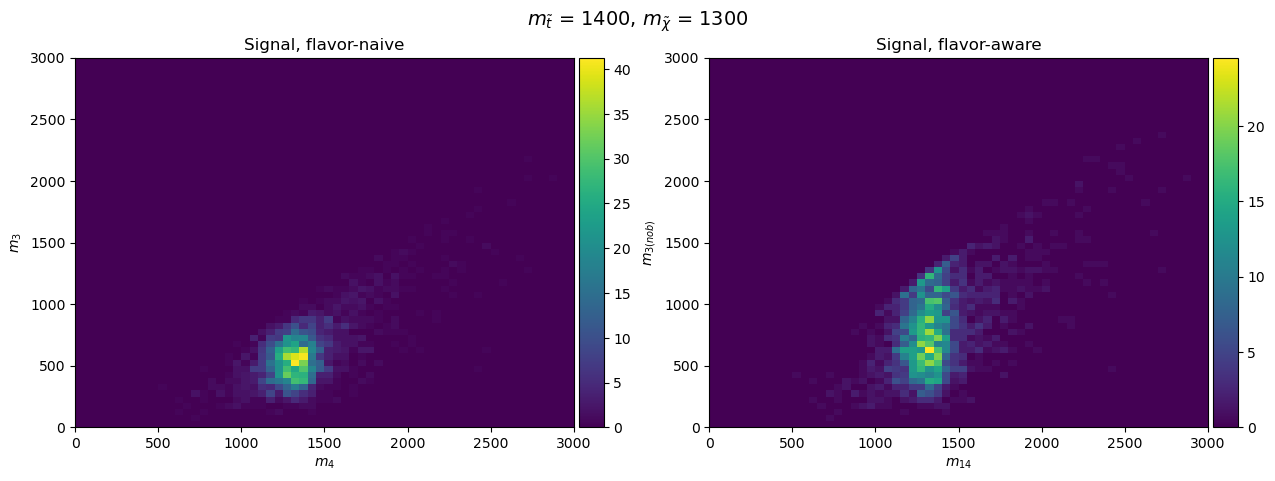

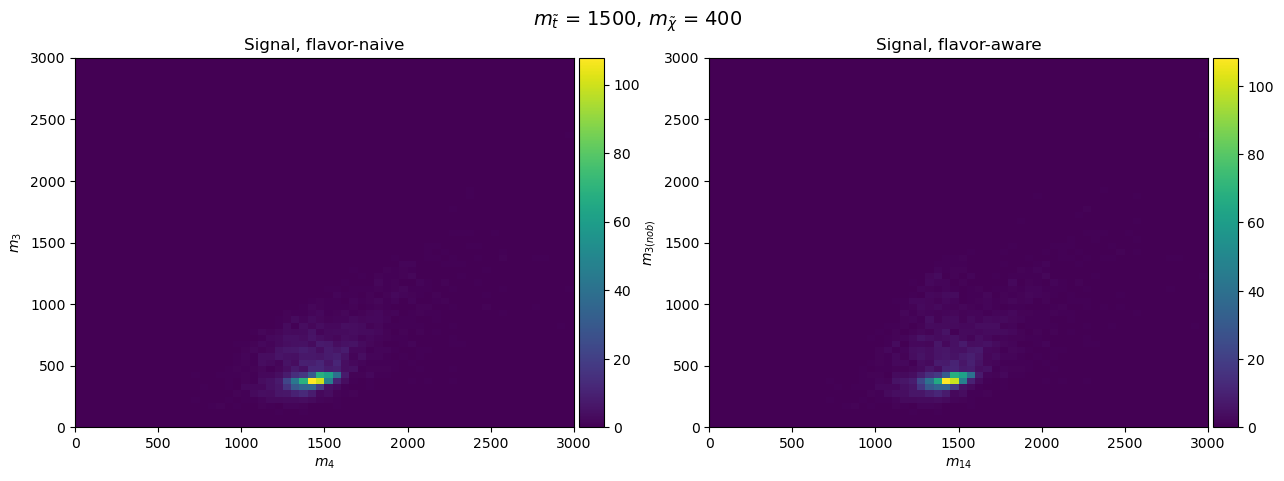

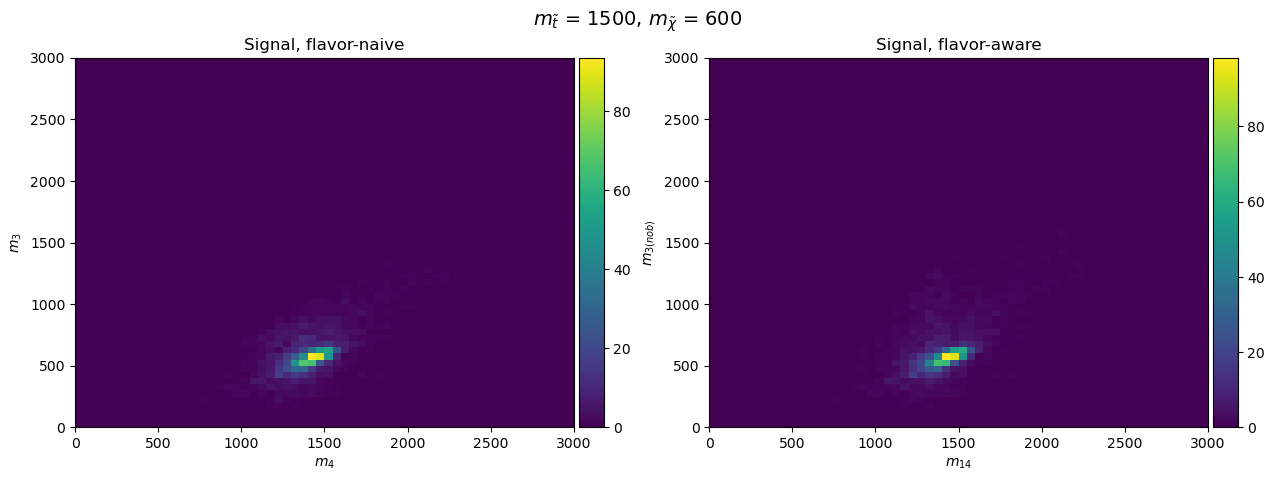

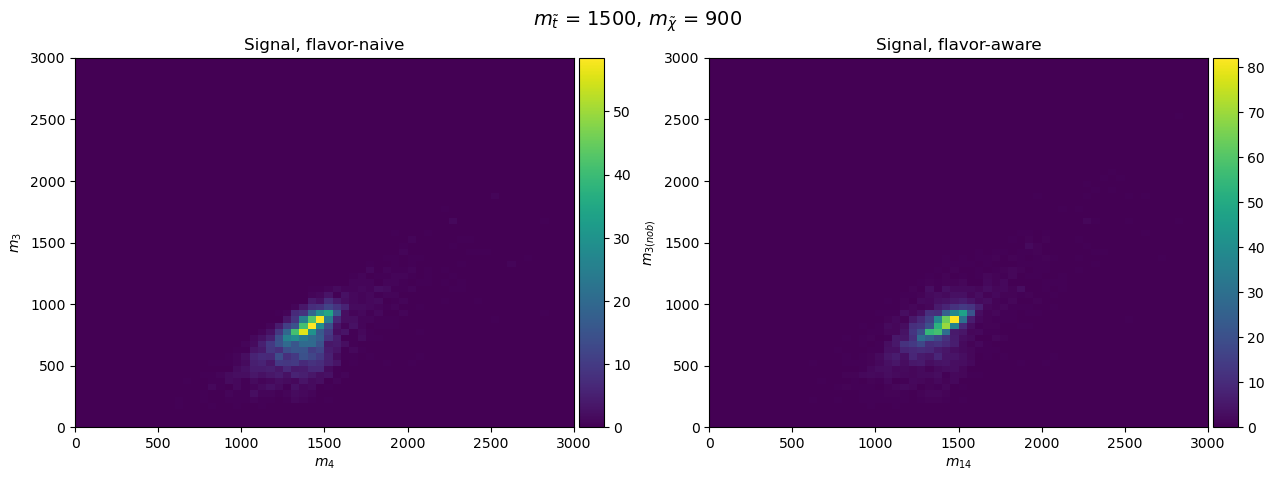

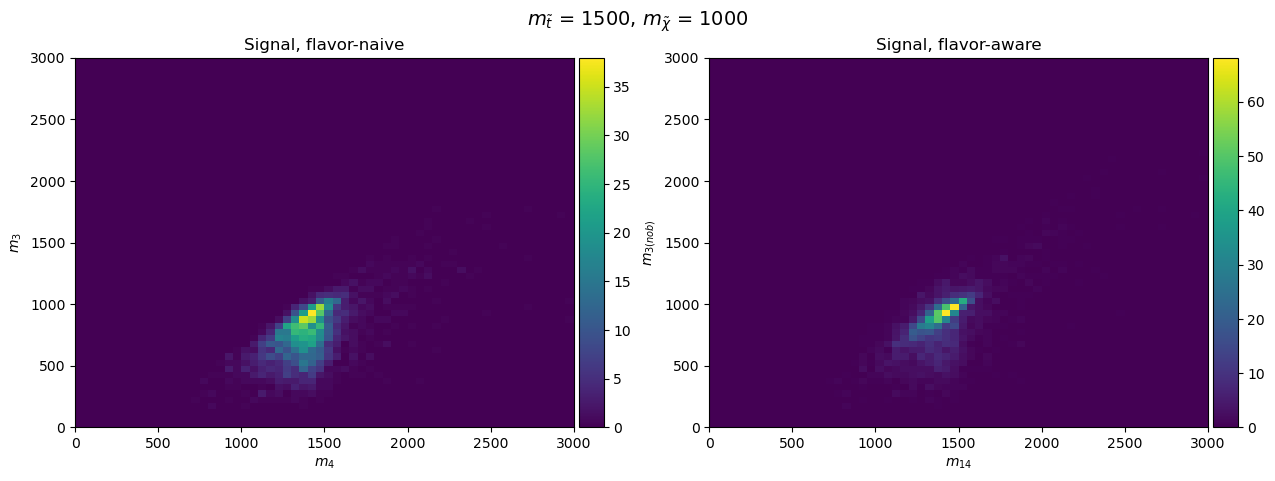

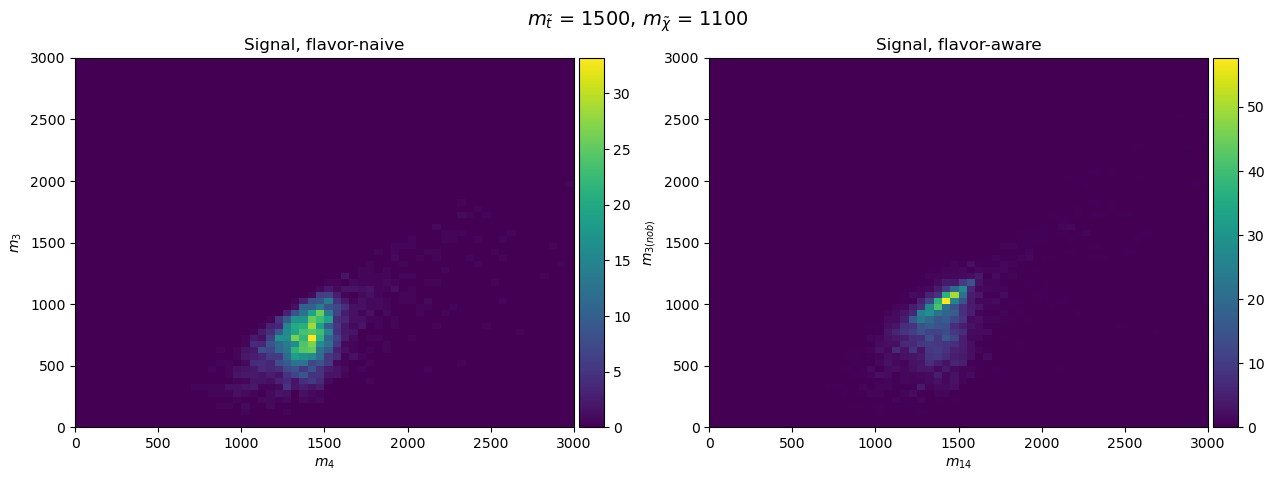

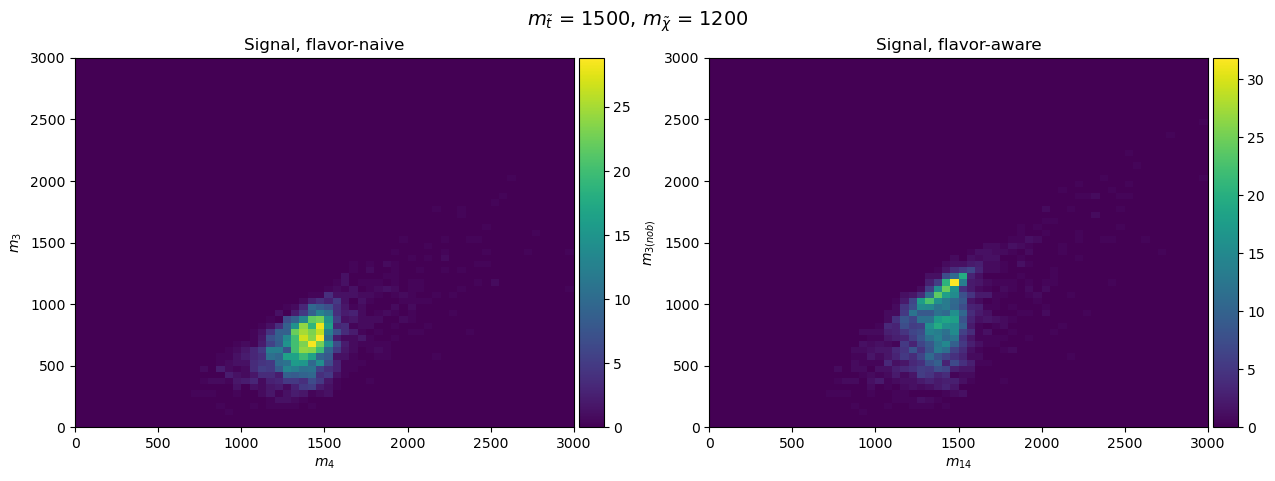

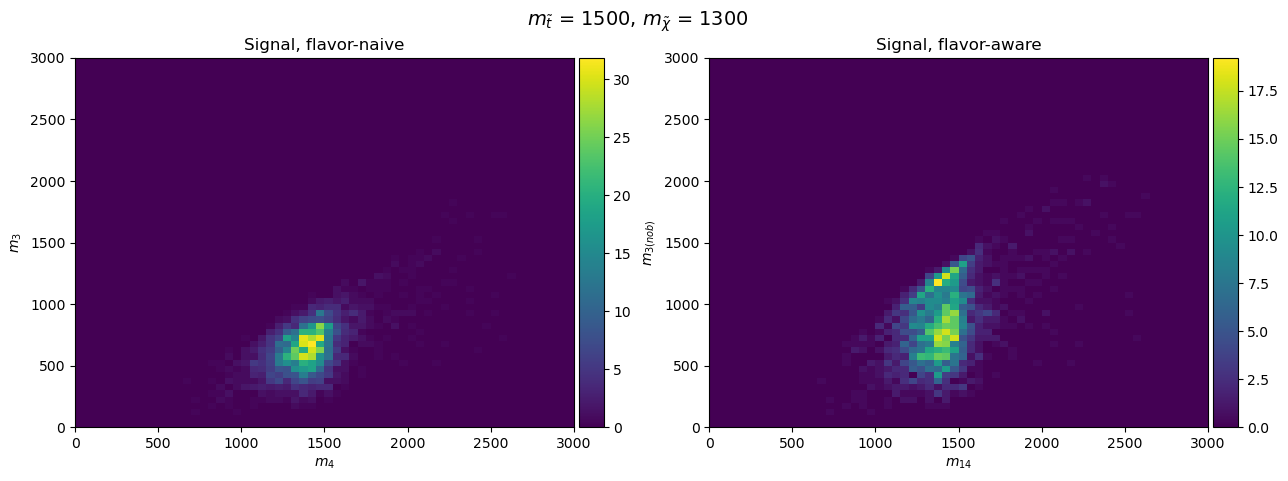

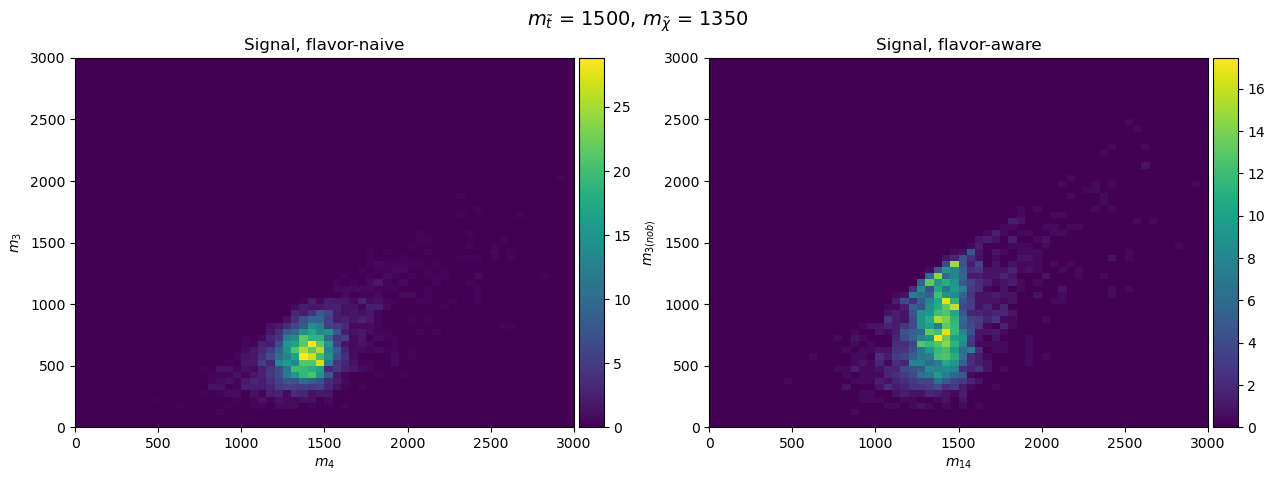

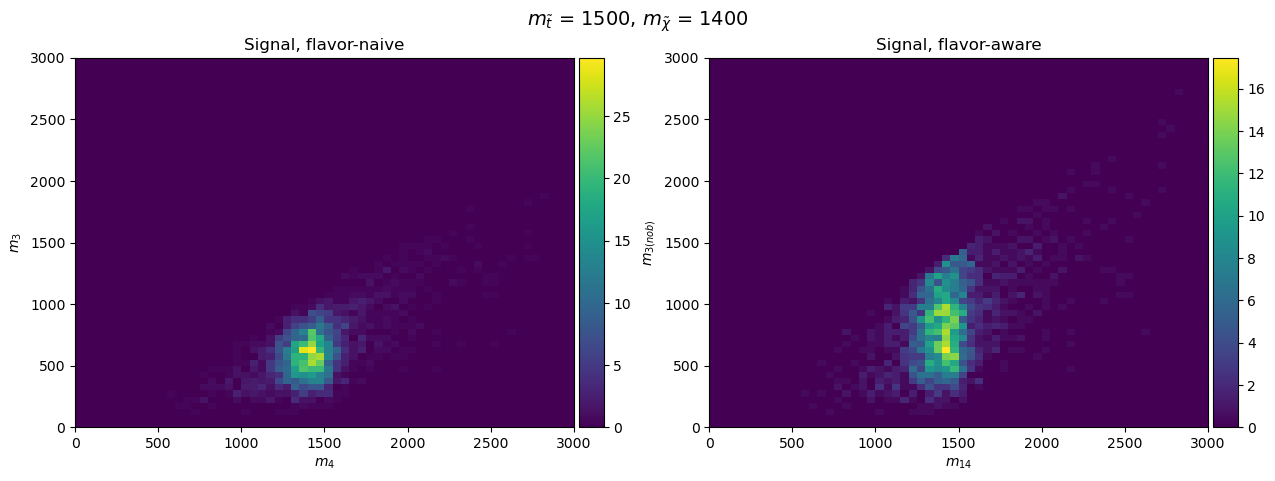

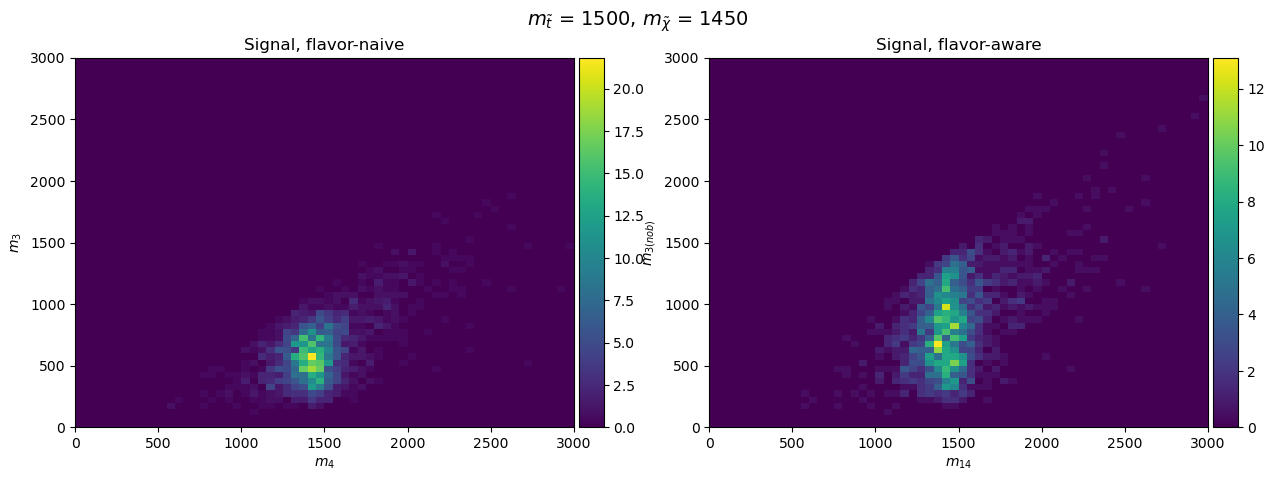

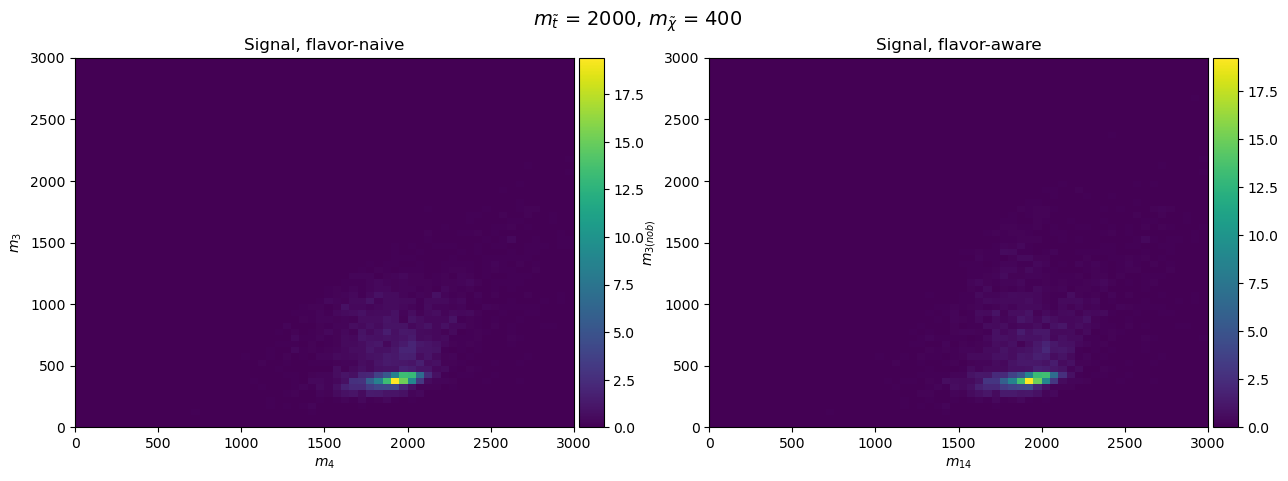

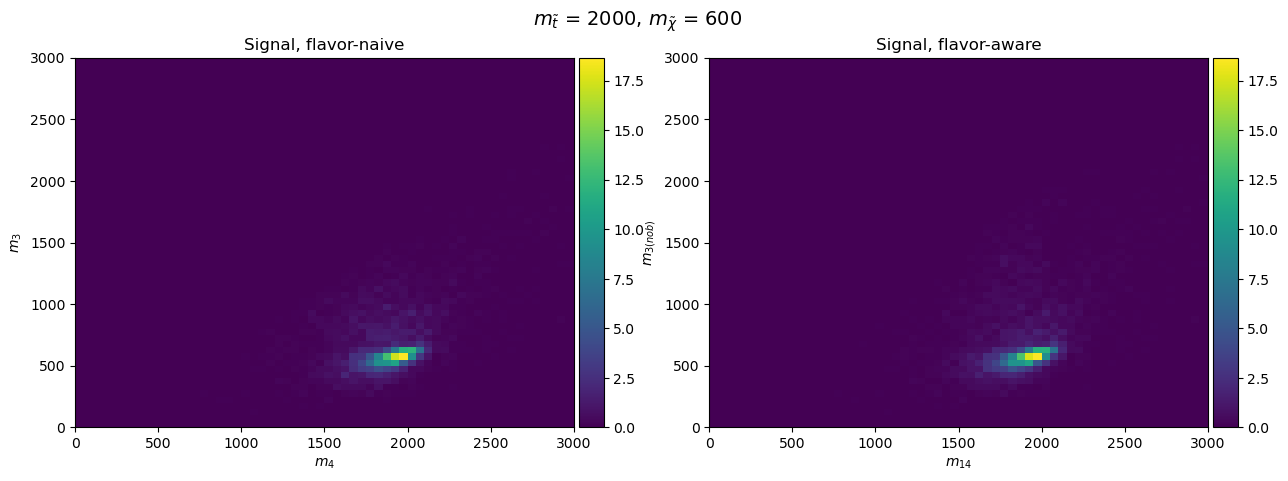

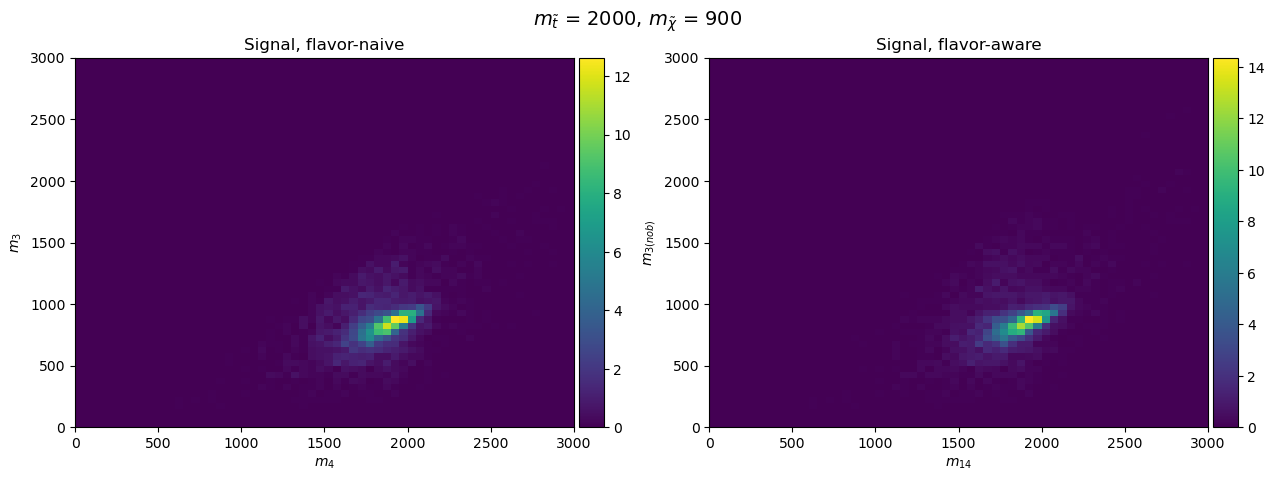

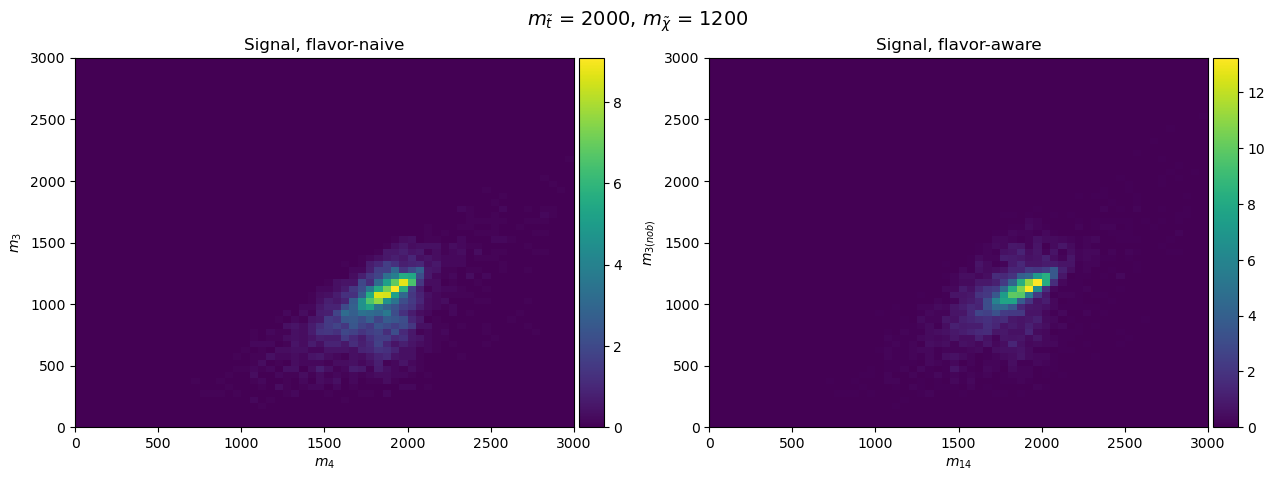

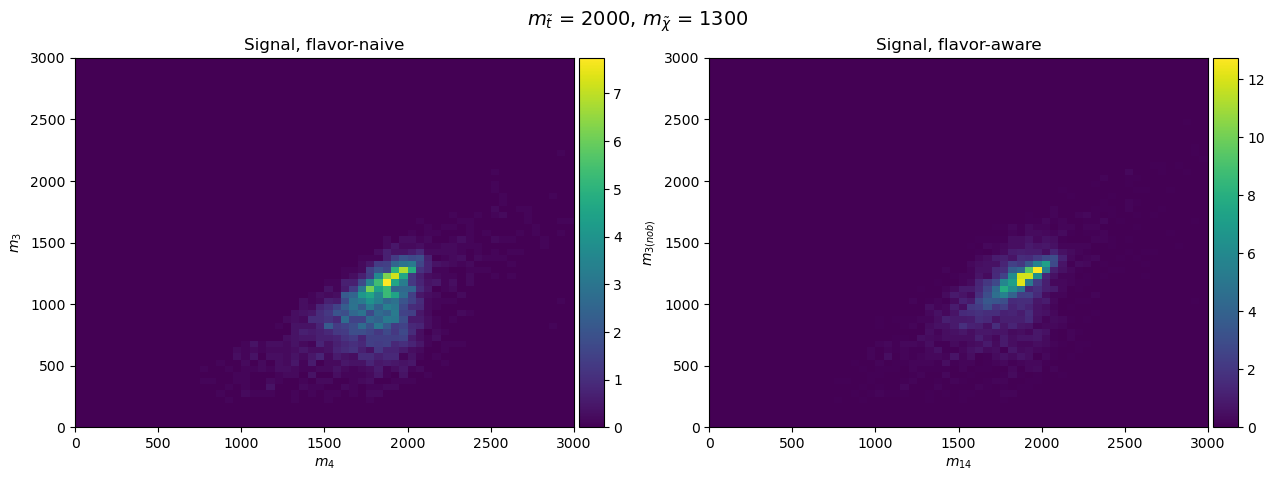

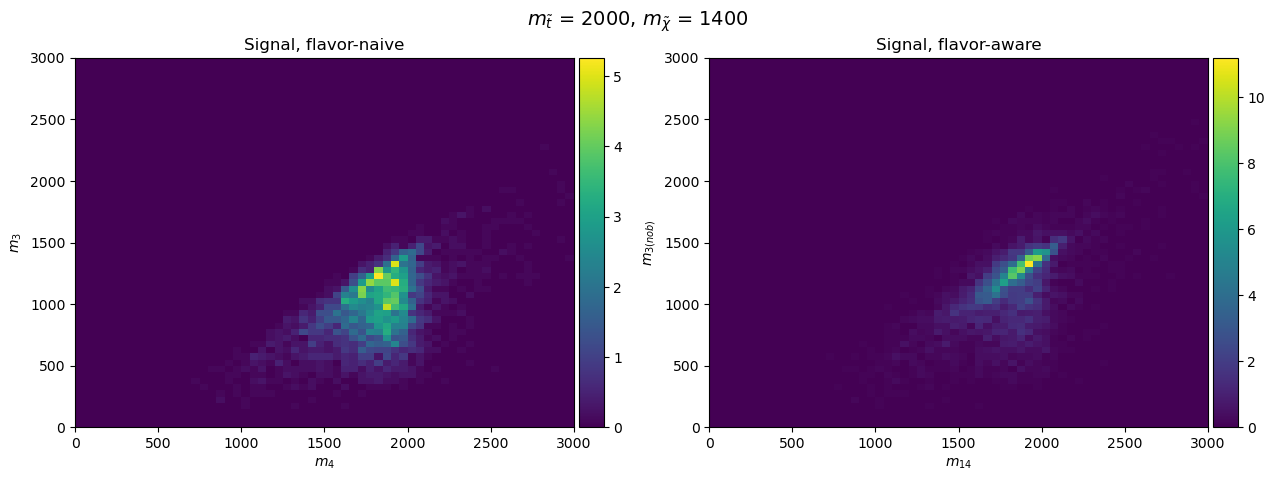

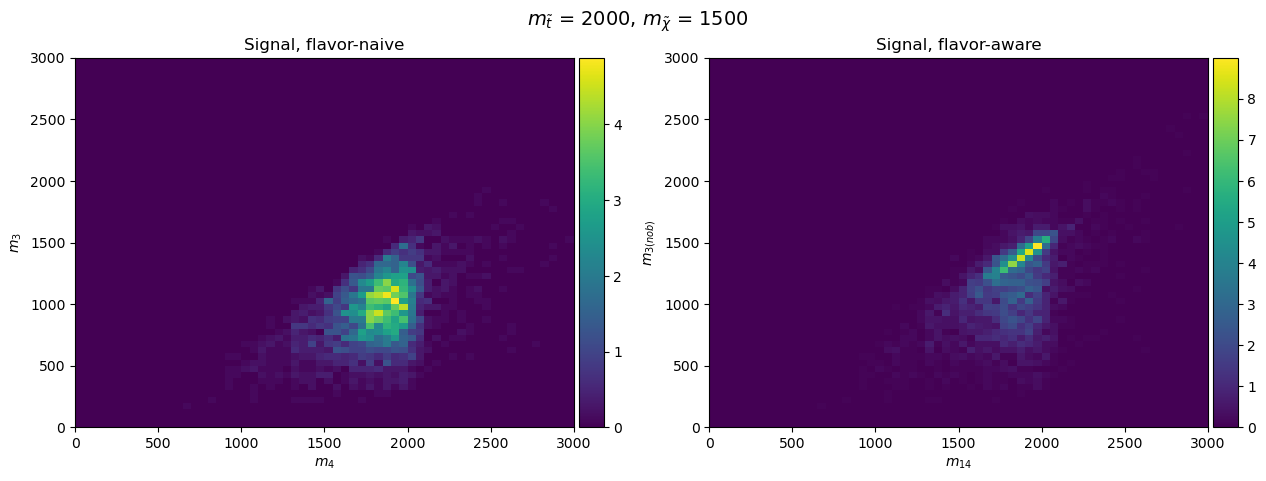

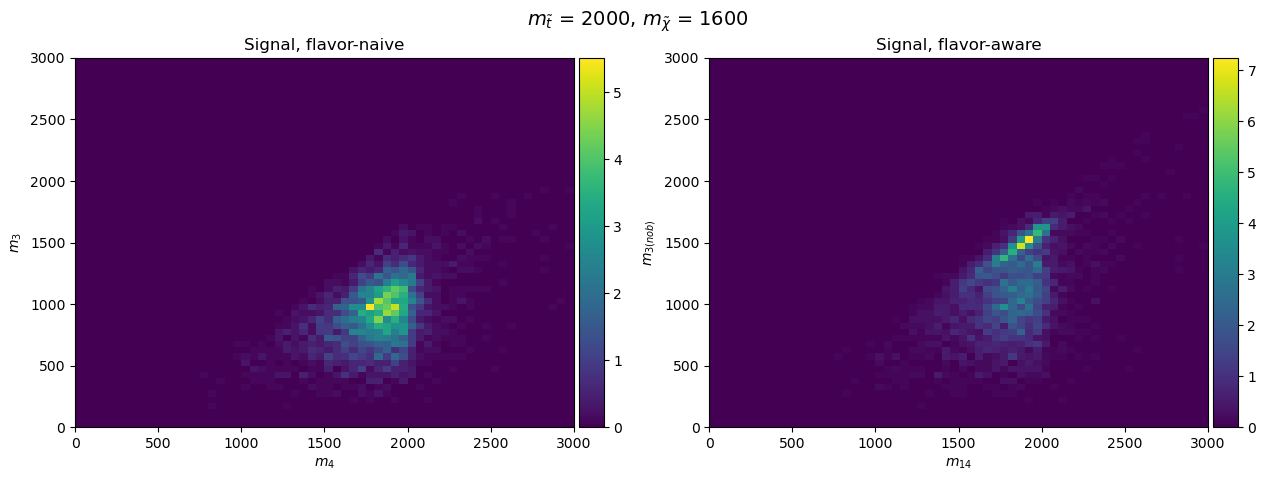

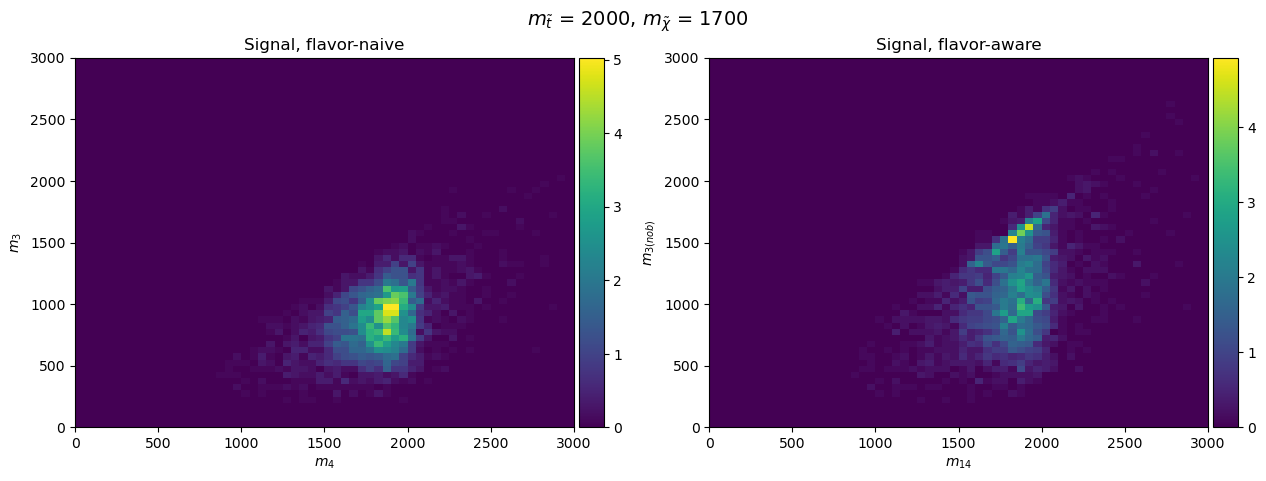

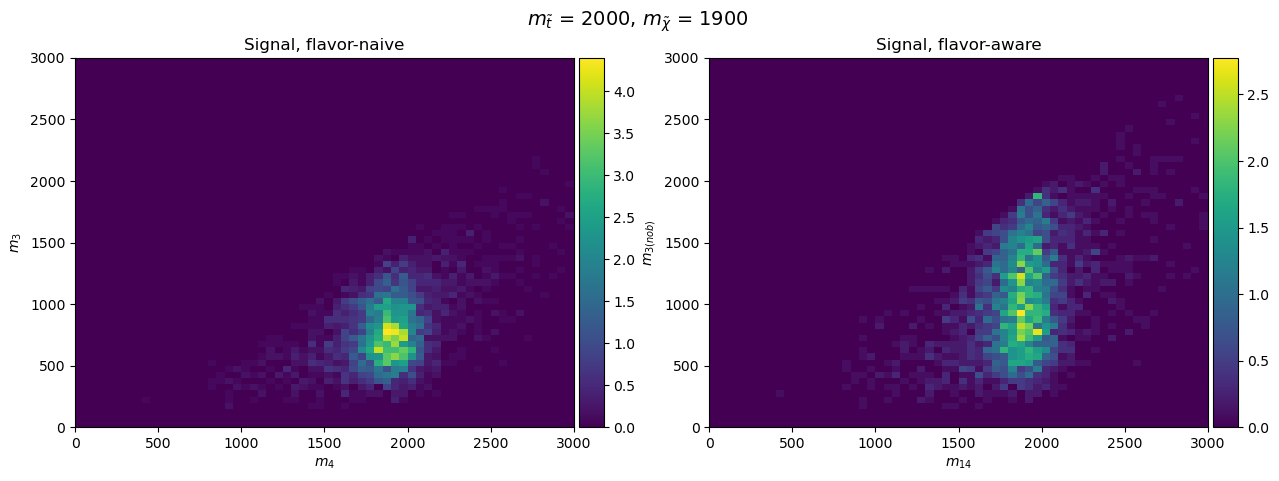

In [63]:
plt.set_cmap("viridis")
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    signal_hist_naive = hists["m14_vs_m24"]
    signal_hist_aware = hists["m14_vs_m3_top_3_no_lead_b"]
    sig_obj_naive = PlotObject.fromHist(signal_hist_naive)
    sig_obj_aware = PlotObject.fromHist(signal_hist_aware)

    signal_style = s.getSet(signal).style
    fig, ax = plt.subplots(1, 2)
    plt.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}", fontsize=14)
    ax[0].title.set_text('Signal, flavor-naive')
    ax[1].title.set_text('Signal, flavor-aware')
    fig.set_figwidth(15)

    drawAs2DHist(ax[0], sig_obj_naive)
    drawAs2DHist(ax[1], sig_obj_aware)
    plt.show()